Installing Marvin:

In [2]:
pip install sdss-marvin 

First attempt at retrieving data, utilizing Marvin's Query tool

In [1]:
from marvin.tools.query import Query

# search for galaxies with an NSA redshift < 0.1
myfilter = 'nsa.z < 0.15'

# create a query
query = Query(search_filter=myfilter)
# return the galaxy RA and Dec as well
myfilter = 'nsa.z < 0.15'
myparams = ['nsa.plate']#, 'cube.dec']

query = Query(search_filter=myfilter, return_params=myparams)
results = query.run()


I ended up using the Pipe3D value added catalogue:

In [ ]:
with fits.open('SDSS17Pipe3D_v3_1_1.fits') as hdul3: 
    data3 = hdul3[1].data 
    print(hdul3[1].columns) 

In [18]:
table3 = Table(data3)
sdssdf = table3.to_pandas()

In [65]:
sdssdf

,name,plate,ifudsgn,plateifu,mangaid,objra,objdec,log_SFR_Ha,FoV,Re_kpc,...,P(Sd),P(Sdm),P(Sm),P(Irr),best_type_n,best_type,nsa_nsaid,Vmax_w,Num_w,QCFLAG
0,manga-10001-12701,10001,12701,10001-12701,1-48157,133.371091,57.598425,-0.089513,5.064127,3.963157,...,0.008204,0.000013,0.000066,0.004655,4,nan,51226,4.221100e-06,50.94970,0
1,manga-10001-12702,10001,12702,10001-12702,1-48188,133.685670,57.480250,-0.608526,3.730578,5.577076,...,0.003161,0.000044,0.000311,0.010744,4,nan,51261,3.713200e-06,44.81920,0
2,manga-10001-12703,10001,12703,10001-12703,1-55648,136.017160,57.092329,0.100403,3.902475,5.857879,...,0.000997,0.000014,0.000098,0.008535,4,nan,59078,1.935540e-06,23.36240,0
3,manga-10001-12704,10001,12704,10001-12704,1-55616,133.989967,57.677968,-0.465114,1.627717,4.571878,...,0.002844,0.000024,0.000171,0.002577,5,nan,59044,1.686390e-06,20.35510,0
4,manga-10001-12705,10001,12705,10001-12705,1-55784,136.751375,57.451437,0.482523,4.555624,5.150673,...,0.001502,0.000009,0.000067,0.004437,4,nan,59219,1.935540e-06,23.36240,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10215,manga-9894-6102,9894,6102,9894-6102,1-294166,251.741870,19.670640,-0.553936,3.452352,2.445081,...,0.029934,0.000033,0.000340,0.027580,5,nan,311194,1.269950e-05,153.28600,0
10216,manga-9894-6103,9894,6103,9894-6103,1-294369,250.198809,20.920389,-0.794054,3.045234,2.897060,...,0.037788,0.000186,0.000215,0.010725,4,nan,311413,1.269950e-05,153.28600,0
10217,manga-9894-6104,9894,6104,9894-6104,1-294374,250.907826,21.691287,0.758206,3.189641,4.160061,...,0.001311,0.000018,0.000129,0.002820,4,nan,311418,2.050230e-06,24.74670,0
10218,manga-9894-9101,9894,9101,9894-9101,1-294459,251.257839,20.571211,-2.902449,4.890395,10.593997,...,0.000501,0.000006,0.000042,0.004490,0,nan,311510,8.662100e-08,1.04554,0


In [67]:
sdssdf['best_type']

0        nan
1        nan
2        nan
3        nan
4        nan
        ... 
10215    nan
10216    nan
10217    nan
10218    nan
10219    nan
Name: best_type, Length: 10220, dtype: object

In [72]:
sdssdf['P(E)'] # probability of being an elliptical galaxy

0        0.001324
1        0.014580
2        0.002353
3        0.004524
4        0.001614
           ...   
10215    0.044406
10216    0.004324
10217    0.003094
10218    0.120617
10219    0.002682
Name: P(E), Length: 10220, dtype: float32

In [144]:
len(sdssdf)

10220

Filtering out to have no elliptical galaxies, because I want to look at younger galaxies and elliptical galaxies are older.

In [73]:
ethresh = 0.001  
noellipzone = sdssdf[sdssdf['P(E)'] < ethresh]
noellipzone

,name,plate,ifudsgn,plateifu,mangaid,objra,objdec,log_SFR_Ha,FoV,Re_kpc,...,P(Sd),P(Sdm),P(Sm),P(Irr),best_type_n,best_type,nsa_nsaid,Vmax_w,Num_w,QCFLAG
23,manga-10213-1902,10213,1902,10213-1902,1-122611,123.453117,41.649479,0.637224,1.620106,7.007950,...,0.000668,0.000005,0.000052,0.001102,5,nan,129851,9.756520e-07,11.77640,0
62,manga-10215-6102,10215,6102,10215-6102,1-153635,122.734118,36.828123,0.648415,3.260944,2.504518,...,0.018668,0.000032,0.000372,0.795898,10,nan,162483,1.793490e-06,21.64780,0
102,manga-10218-12704,10218,12704,10218-12704,1-584678,119.060993,17.020286,-0.286996,3.029757,2.932330,...,0.021399,0.000034,0.000837,0.843216,10,nan,622212,2.007040e-05,242.25500,0
151,manga-10221-12702,10221,12702,10221-12702,1-298600,123.530410,23.711915,-0.907881,1.693342,6.155413,...,0.027095,0.000035,0.889563,0.000330,9,nan,315937,1.282700e-05,154.82500,0
152,manga-10221-12703,10221,12703,10221-12703,1-230023,124.056950,25.076000,-0.751711,2.647027,3.100601,...,0.780139,0.000009,0.000176,0.004595,7,nan,243633,3.002450e-05,362.40300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,manga-9509-6101,9509,6101,9509-6101,1-230129,123.457540,26.254700,-0.729252,2.788229,3.504276,...,0.001622,0.000005,0.000032,0.002120,5,nan,243752,9.912110e-07,11.96420,0
10000,manga-9881-9102,9881,9102,9881-9102,1-458248,205.386543,25.312108,0.332405,2.837610,6.118010,...,0.003544,0.000039,0.000226,0.891138,10,nan,484542,6.943190e-07,8.38060,0
10063,manga-9885-6101,9885,6101,9885-6101,1-442338,239.419158,22.653394,-0.071244,4.602765,3.217636,...,0.008800,0.000003,0.000035,0.868473,10,nan,467478,4.011920e-07,4.84248,0
10076,manga-9886-3701,9886,3701,9886-3701,1-594067,237.785510,25.722870,-1.995763,1.156852,5.510684,...,0.007801,0.000003,0.000067,0.867416,10,nan,632905,2.011250e-05,242.76300,0


Now my sample size has been reduced to 100 galaxies. 

I followed the procedure set out in the Marvin tutorial to extract the spatially-resolved mass metallicity relation. I wanted to get maps of the metallicity gradients of my galaxies.

[WARNING]: v3_1_1 is an invalid version and will not be supported in a future release (PkgResourcesDeprecationWarning)
[WARNING]: v2_5_3 is an invalid version and will not be supported in a future release (PkgResourcesDeprecationWarning)


<WCSAxes:>

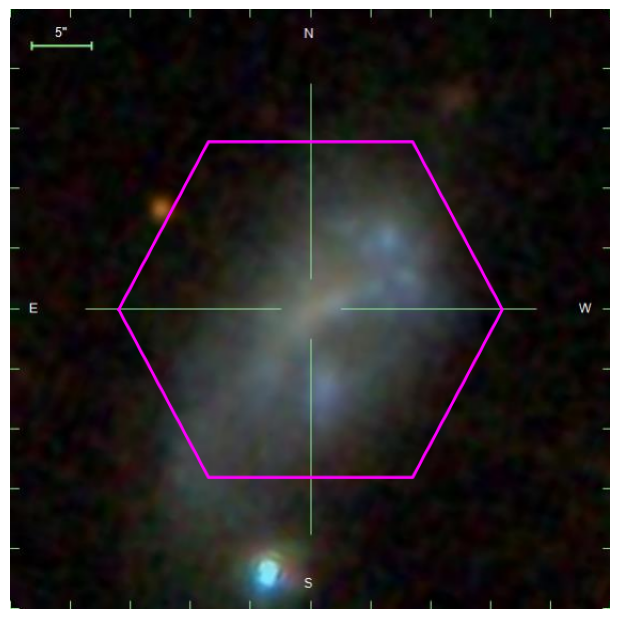

In [94]:
from marvin.tools.image import Image
um = Image(plateifu = '10218-12704')
um.plot()

In [95]:
from marvin.tools import Maps
maps = Maps('10218-12704')

In [97]:
# attempting metallicity calculation
nii = maps.emline_gflux_nii_6585
ha = maps.emline_gflux_ha_6564
n2 = nii / ha
logn2 = np.log10(n2)
oh = 8.90 + 0.57 * logn2
oh

<Marvin EnhancedMap>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]]) ''

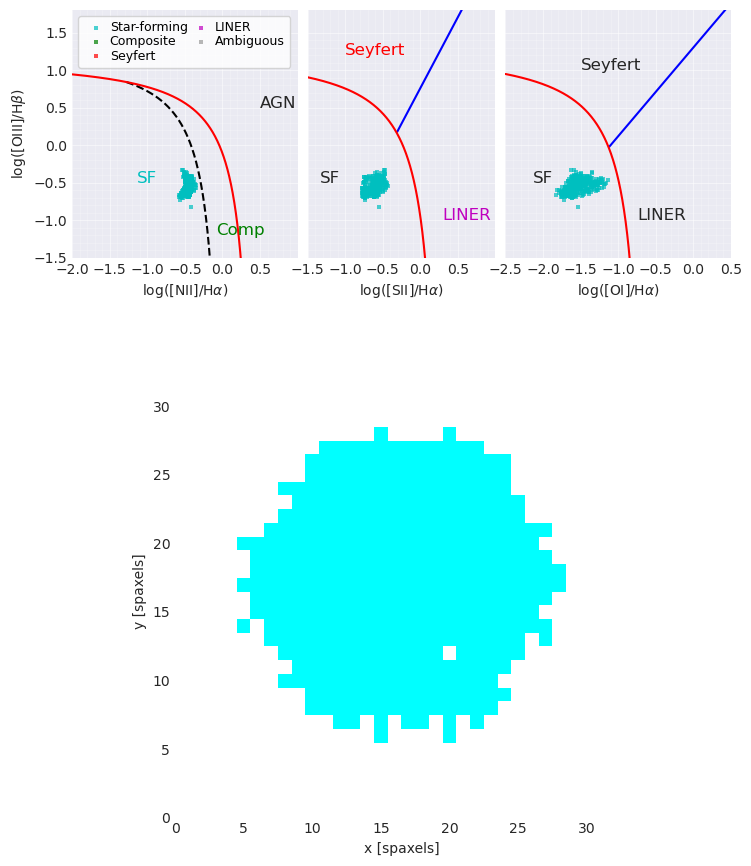

[WARNING]: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first. (MatplotlibDeprecationWarning)


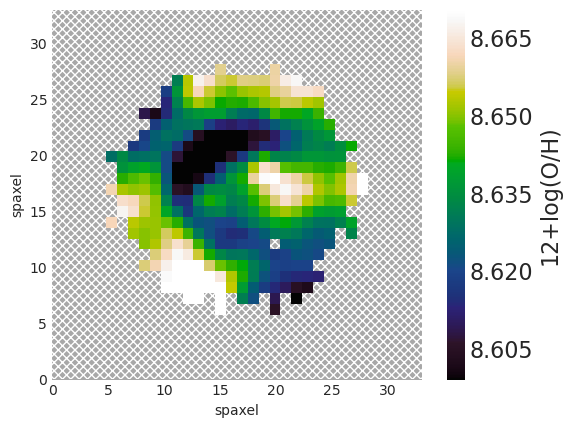

In [77]:
masks_bpt, __, __ = maps.get_bpt()
mask_non_sf = ~masks_bpt['sf']['global'] * n2.pixmask.labels_to_value('DONOTUSE')
mask_bad_data = n2.pixmask.get_mask(['NOCOV', 'UNRELIABLE', 'DONOTUSE'])
min_snr = 3.
mask_nii_low_snr = (np.abs(nii.value * np.sqrt(nii.ivar)) < min_snr)
mask_ha_low_snr = (np.abs(ha.value * np.sqrt(ha.ivar)) < min_snr)
mask = mask_non_sf | mask_bad_data | mask_nii_low_snr | mask_ha_low_snr
fig, ax = oh.plot(mask=mask, cblabel='12+log(O/H)')

In [78]:
noellipzone['log_NII_Ha_cen']

23      -0.483582
62      -0.686795
102     -0.757422
151     -1.007375
152     -0.737447
           ...   
9571    -0.994832
10000   -0.650982
10063   -0.934131
10076   -0.821955
10140   -0.064241
Name: log_NII_Ha_cen, Length: 100, dtype: float64

In [79]:
noellipzone['Age_LW_Re_fit']

23       8.708065
62       8.662464
102      8.432750
151      8.693566
152      8.600898
           ...   
9571     8.509787
10000    8.469137
10063    8.371798
10076    8.325540
10140    8.601211
Name: Age_LW_Re_fit, Length: 100, dtype: float64

I now filtered for young stars as defined in the 2024 Looser paper, where young is < 300 Myr. This narrowed my sample to 30 galaxies.

In [80]:
young_stars_log = noellipzone[noellipzone['Age_LW_Re_fit'] < 8.48]

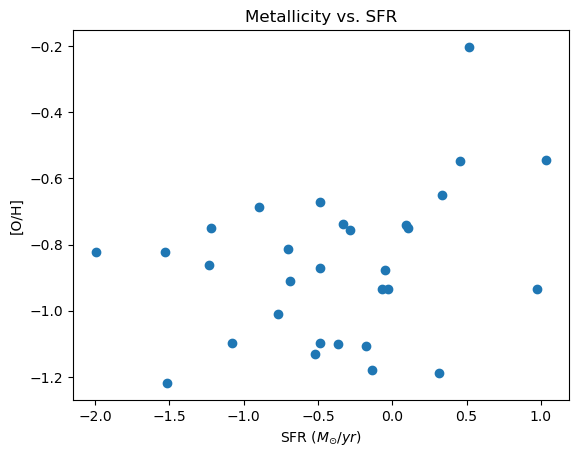

In [83]:
youngsfrha = young_stars_log['log_SFR_Ha']
youngmet = young_stars_log['log_NII_Ha_cen']
plt.scatter(youngsfrha, youngmet)
plt.xlabel('SFR ($M_{\odot}/yr$)')
plt.ylabel('[O/H]')
plt.title('Metallicity vs. SFR');

In [84]:
galaxyids = young_stars_log['plateifu']

Here I wrote a function to process each of my 30 galaxies and retrieve their metallicity gradient plots.

In [85]:
def process_galaxy(galaxy_id):
    try:
        # Load the MAPS for the galaxy
        maps = Maps(plateifu=galaxy_id)

        # Get the emission line data
        ha = maps.emline_gflux_ha_6564
        nii = maps.emline_gflux_nii_6585
        oiii = maps.emline_gflux_oiii_5008

        # Create masks for bad data and low SNR
        snr_mask = (ha.snr < 3) | (nii.snr < 3) | (oiii.snr < 3)
        quality_mask = ha.mask | nii.mask | oiii.mask

        # Combine masks
        mask = snr_mask | quality_mask

        # Calculate [NII]/H-alpha ratio and log it
        nii_ha_ratio = np.log10(nii.value / ha.value)

        # Apply the mask
        nii_ha_ratio = np.ma.array(nii_ha_ratio, mask=mask)

        # Plotting
        fig, ax = plt.subplots(figsize=(8, 8))
        cax = ax.imshow(nii_ha_ratio, cmap='viridis', interpolation='none')
        fig.colorbar(cax, label='Log([NII]/H-alpha)')
        ax.set_title(f'Metallicity Map for {galaxy_id}')
        plt.show()

    except Exception as e:
        print(f"Failed to process galaxy {galaxy_id}: {e}")

[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


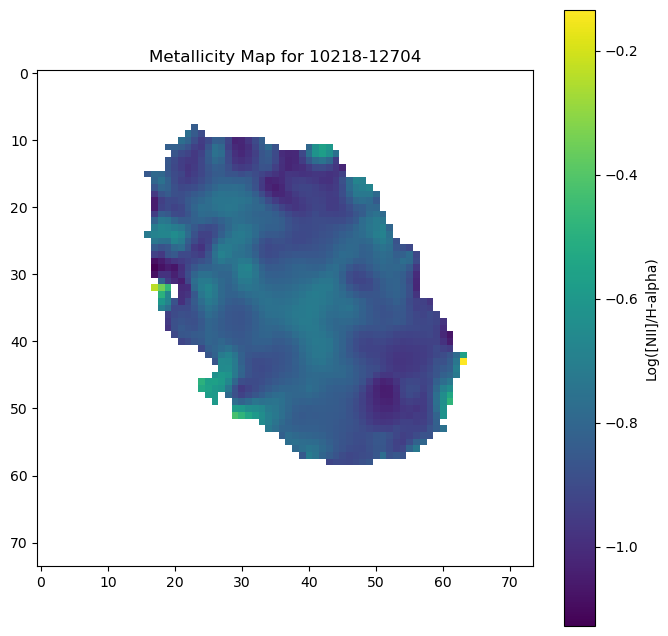

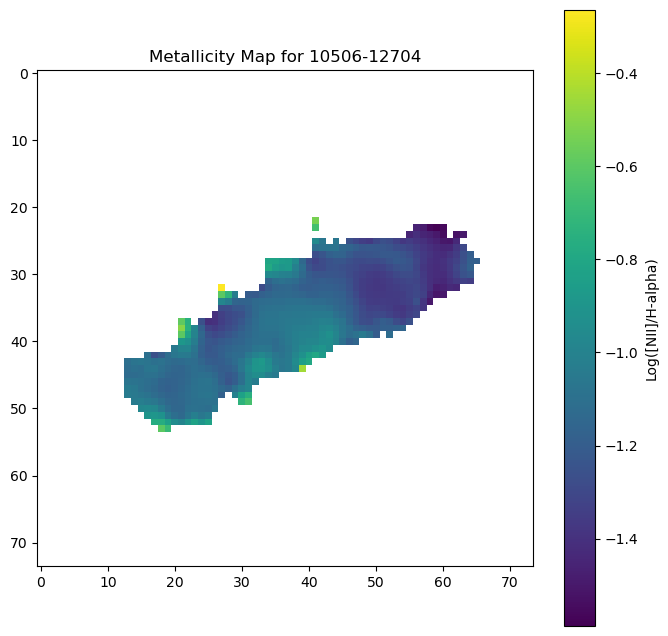

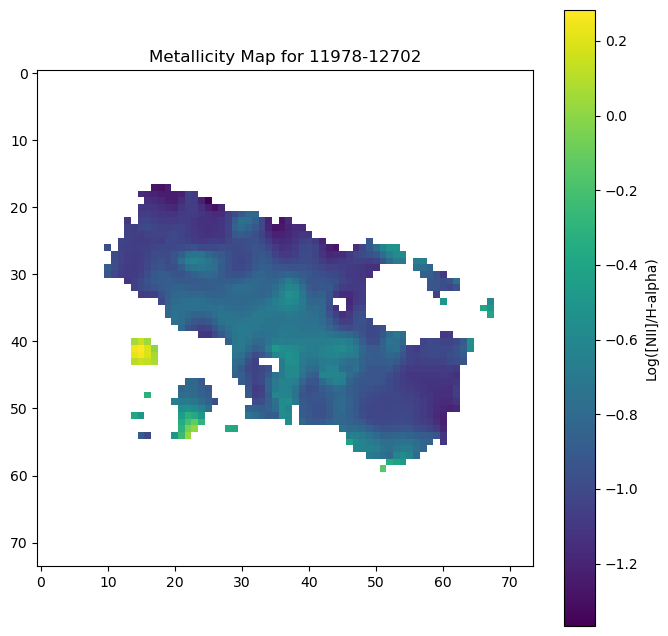

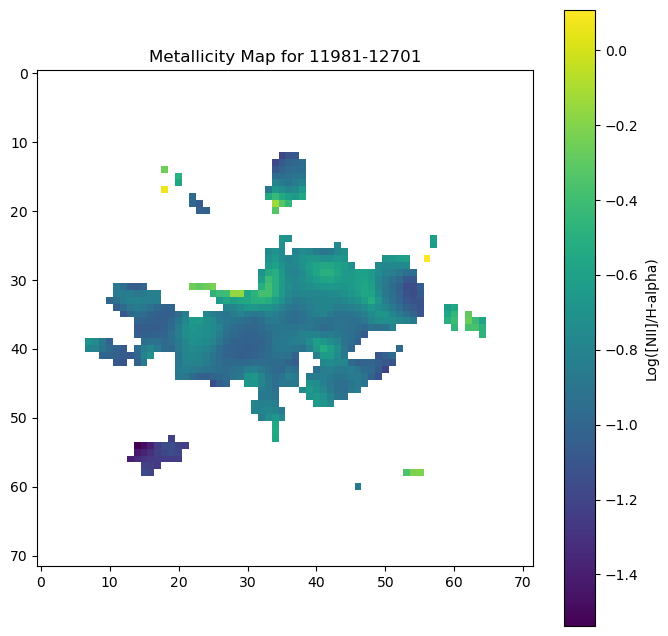

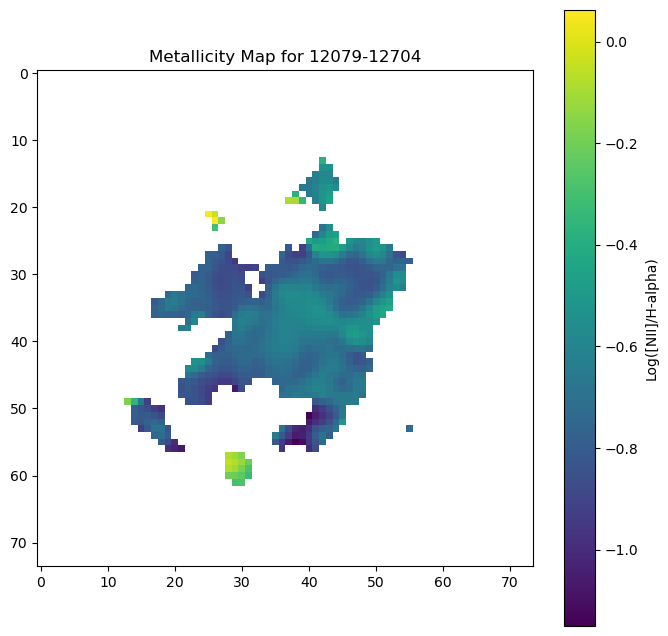

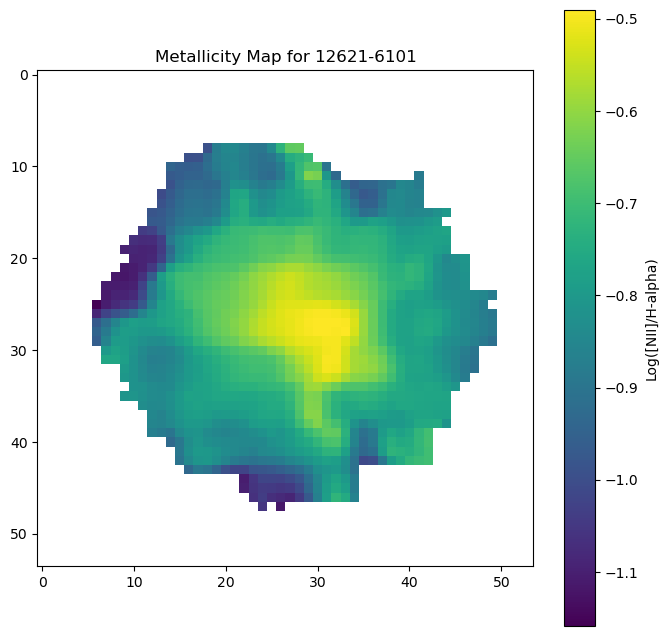

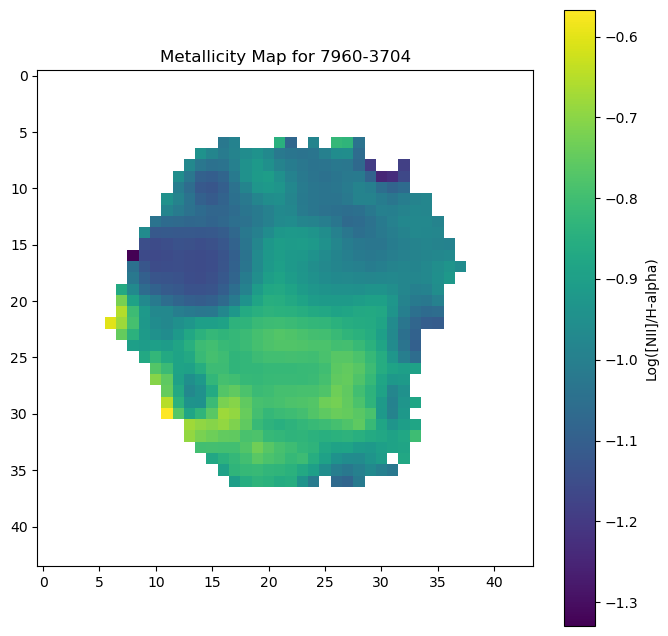

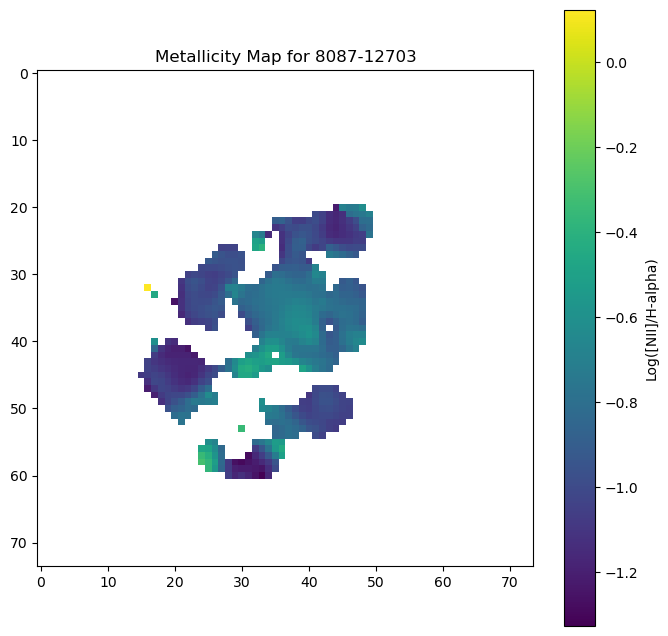

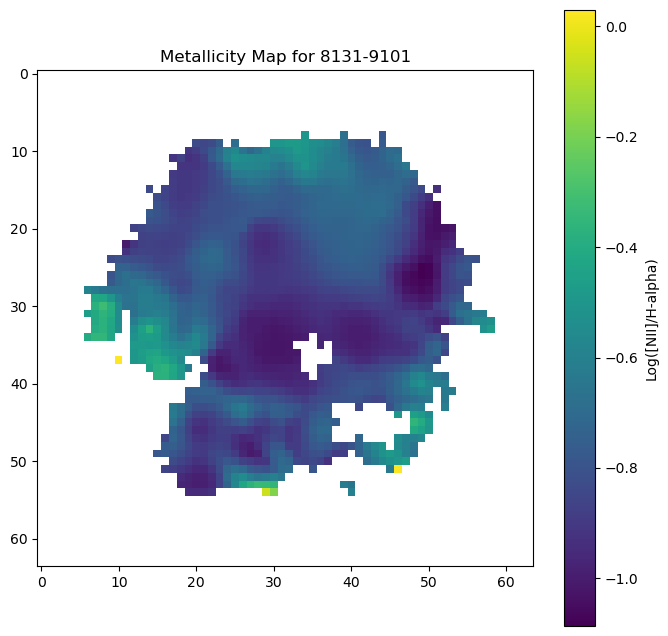

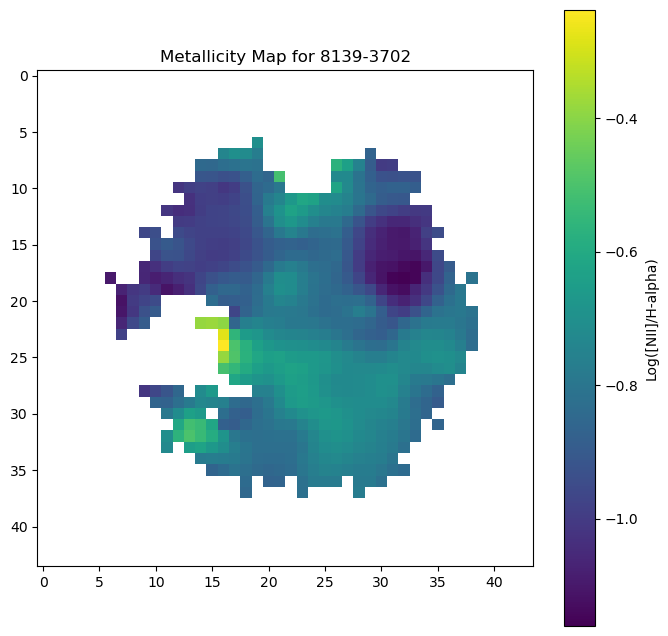

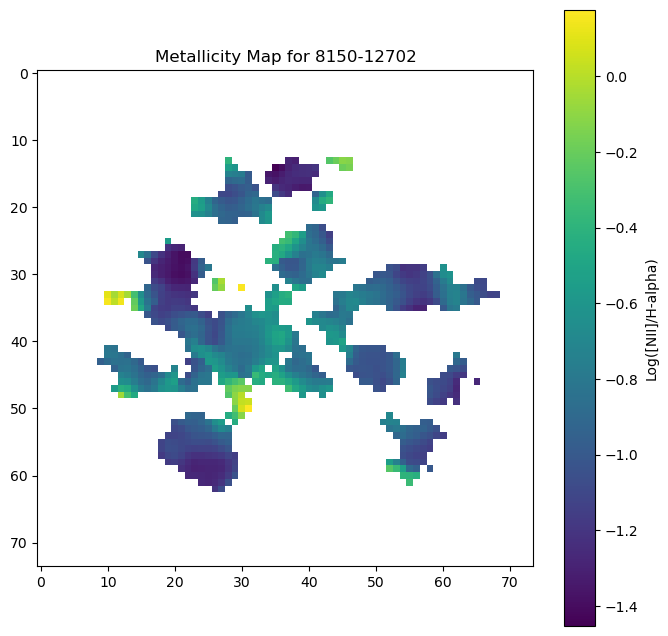

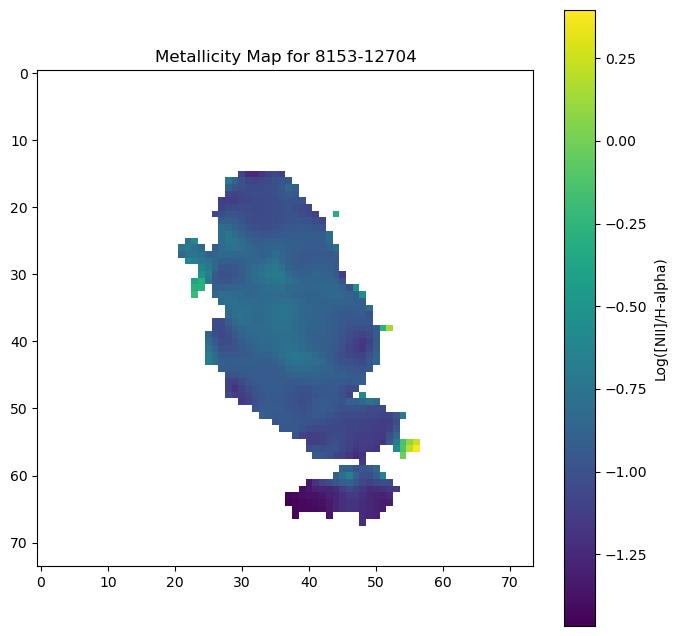

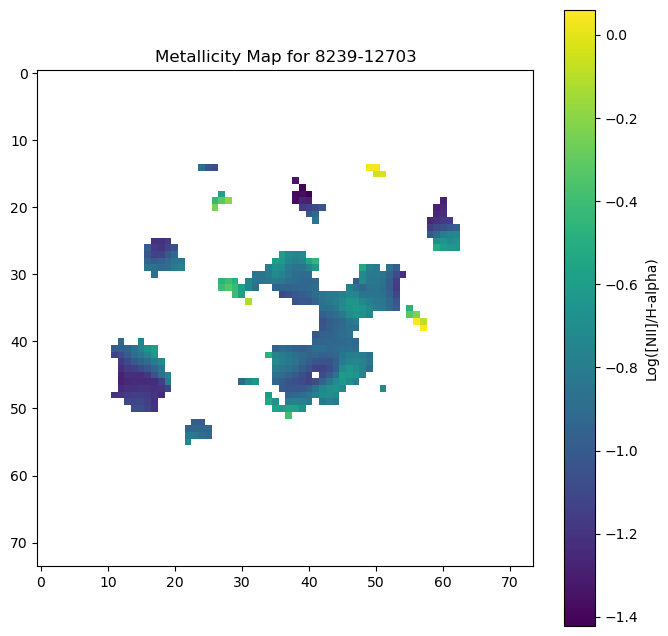

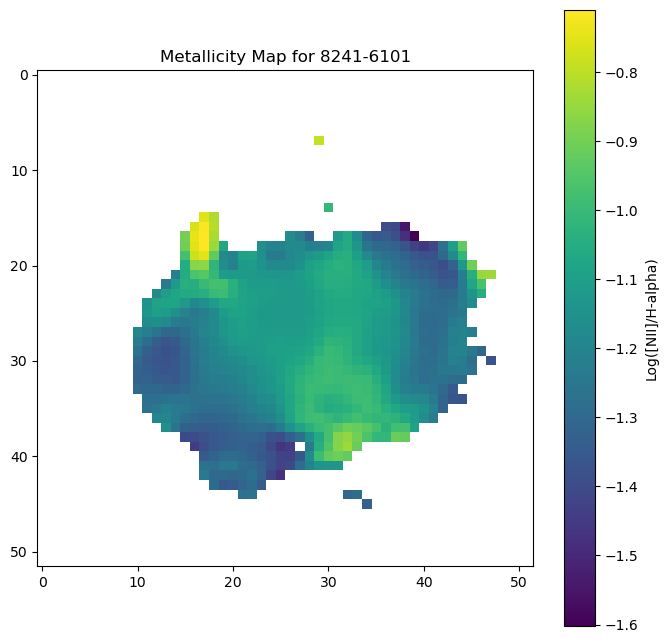

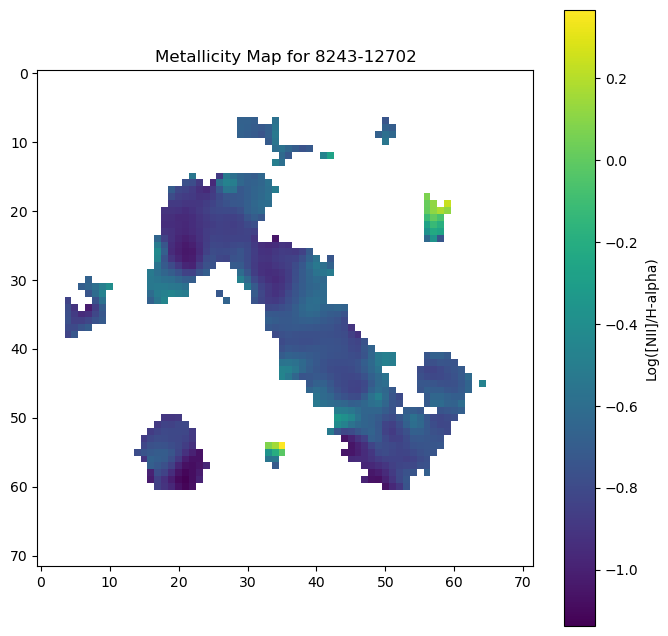

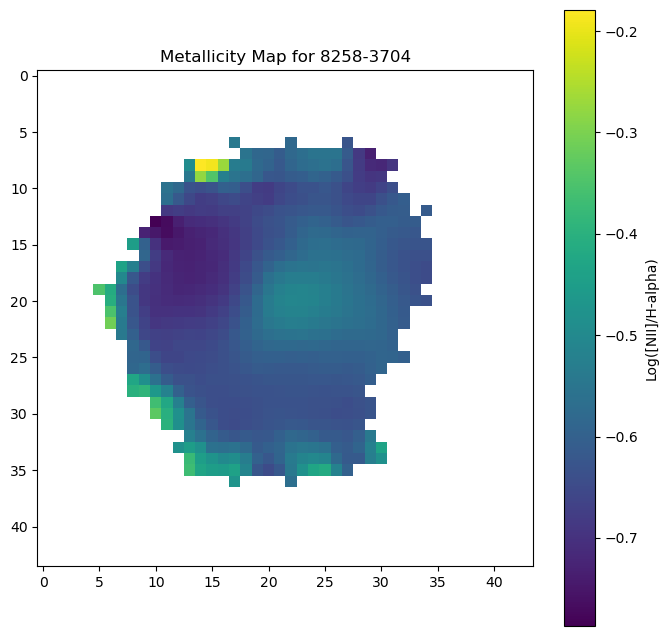

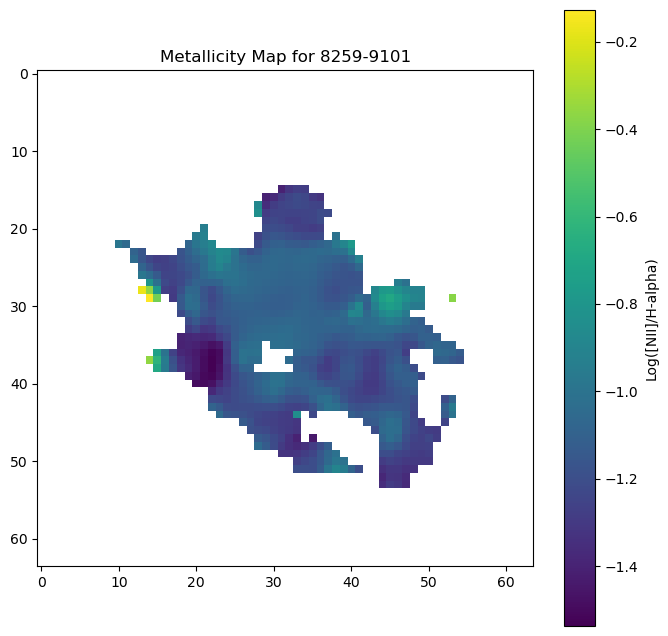

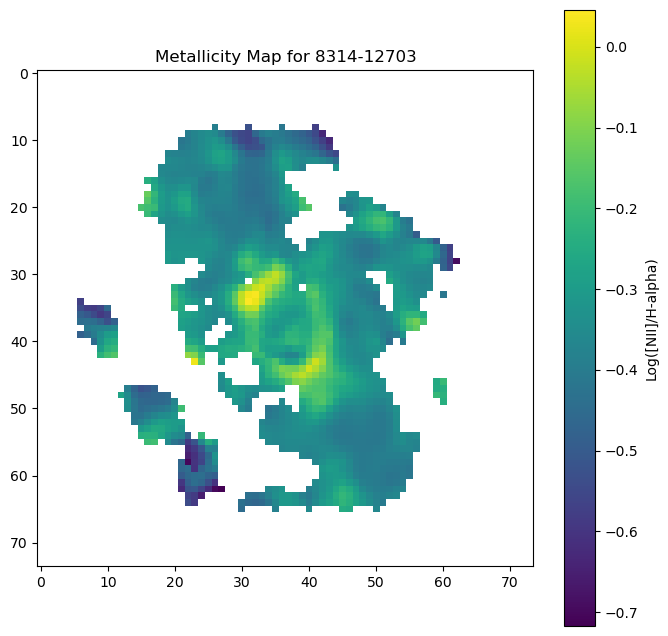

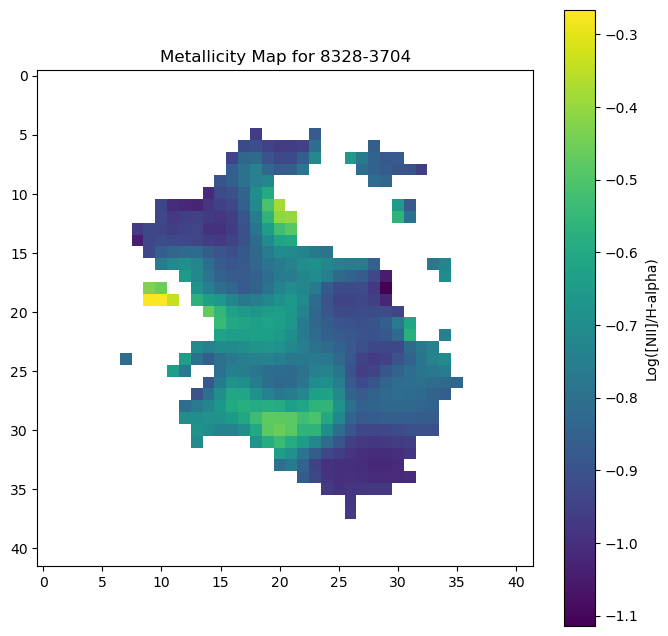

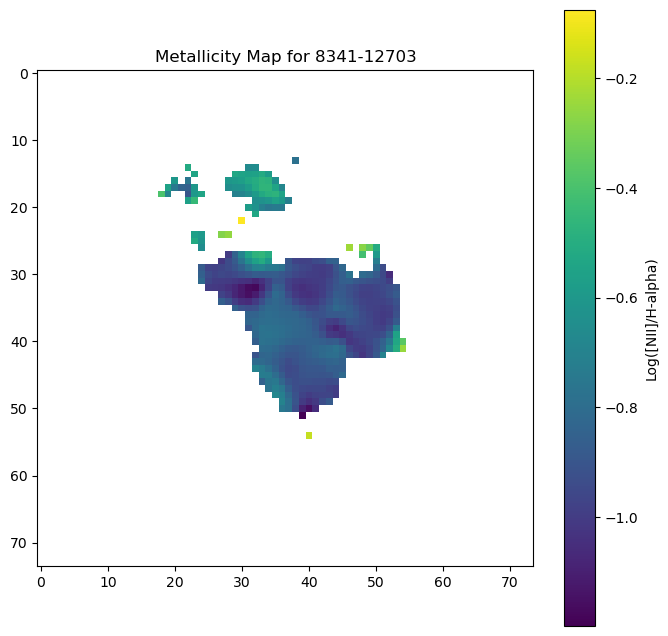

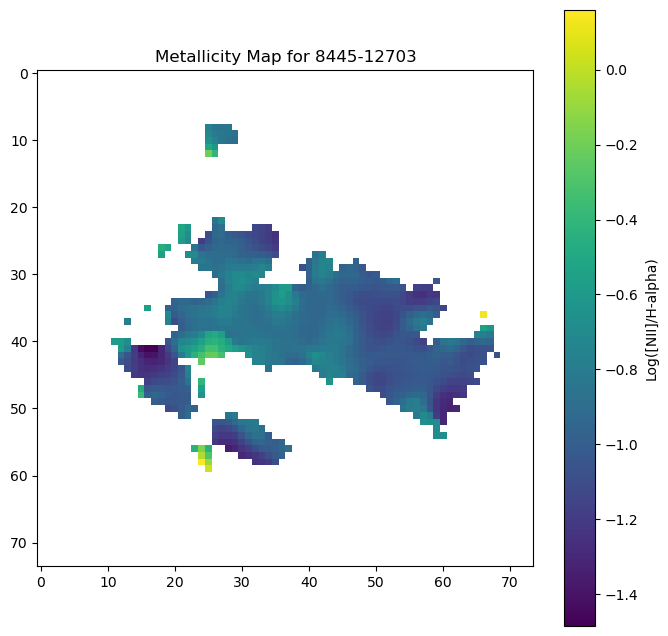

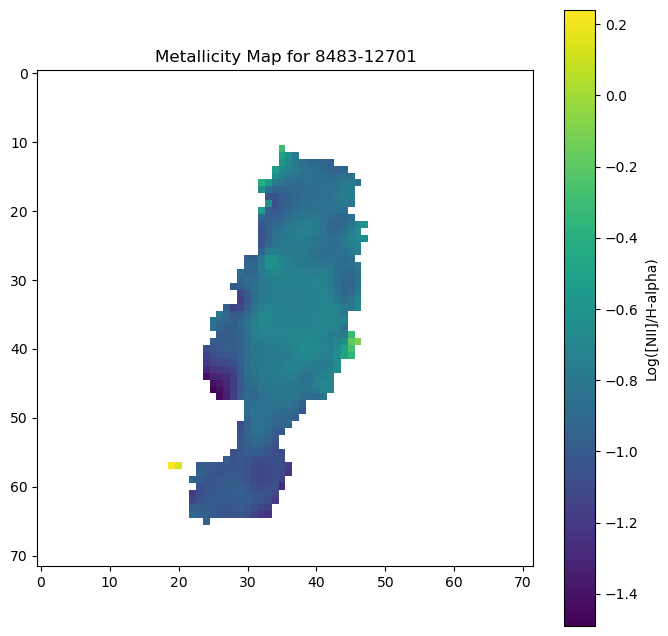

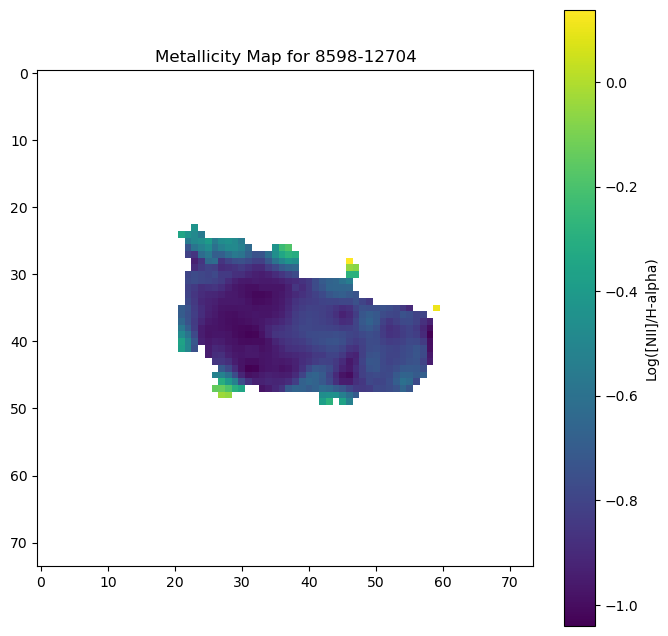

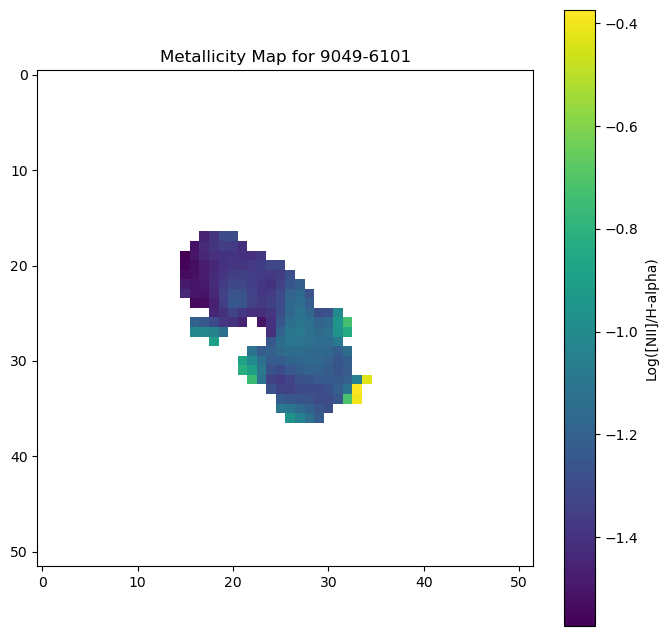

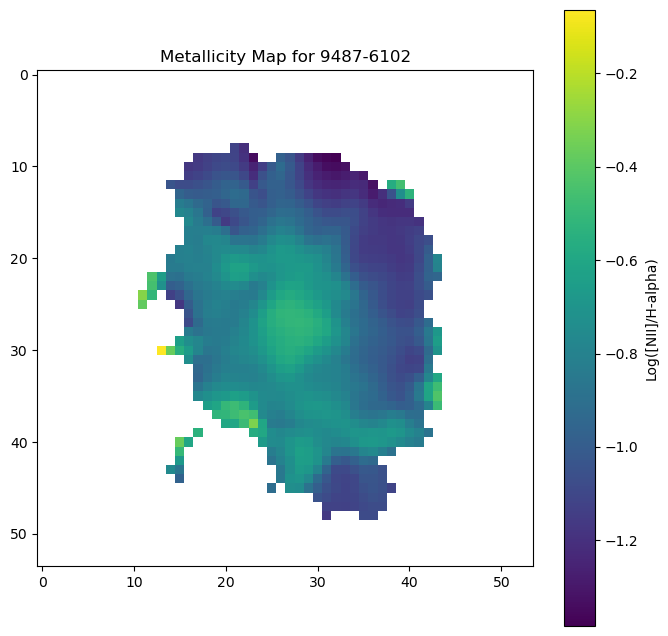

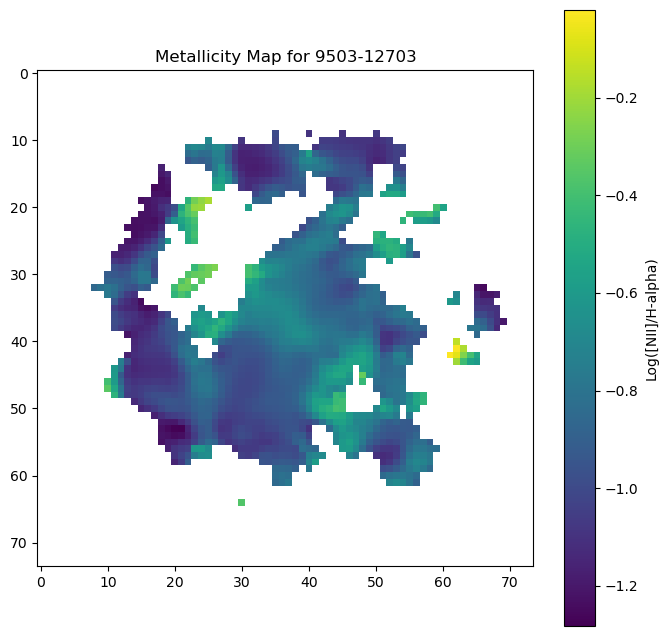

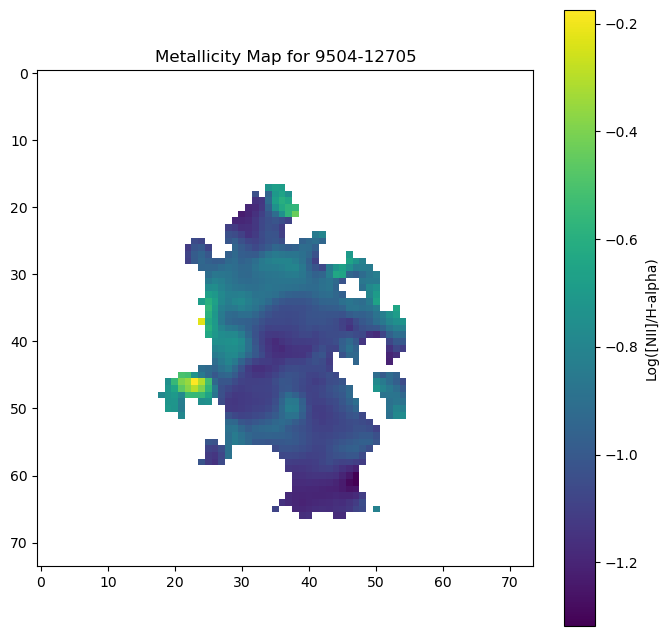

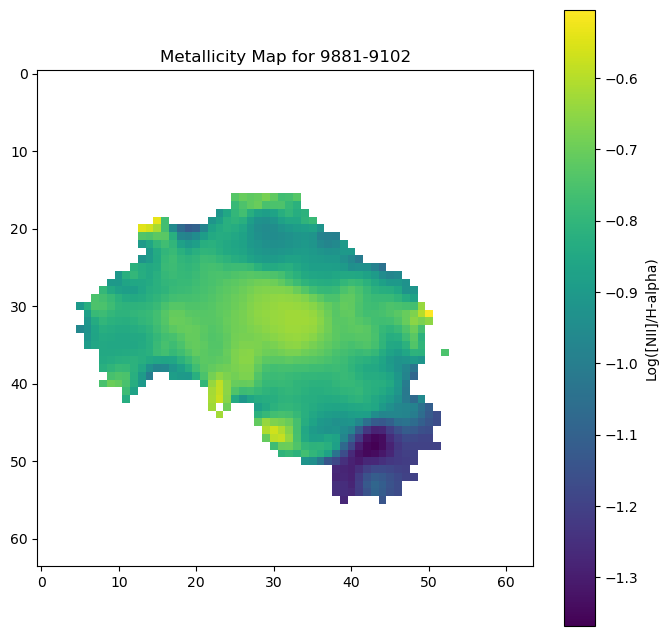

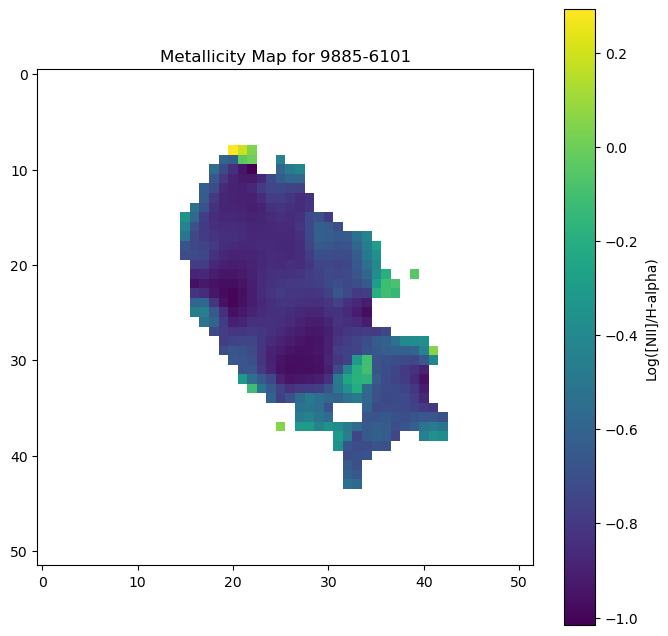

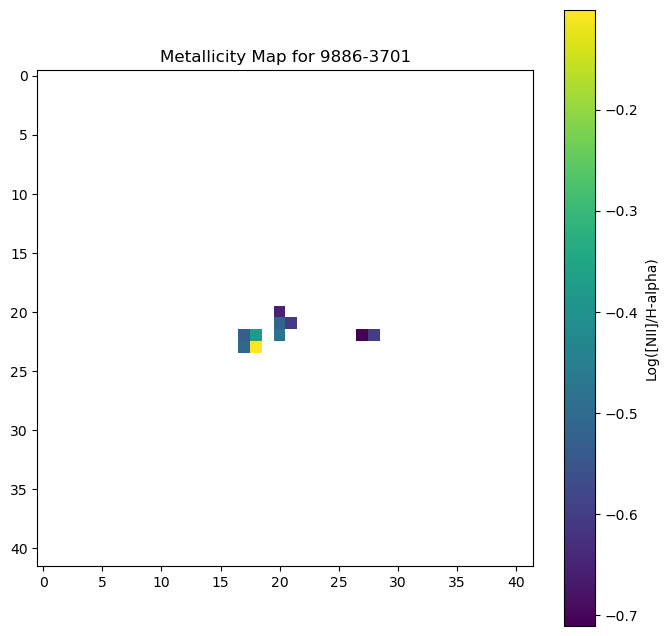

In [153]:
for galaxy_id in galaxyids:
    process_galaxy(galaxy_id)


In [105]:
import pandas as pd

# Assuming 'young_stars_log' is your DataFrame containing all the galaxy data
# Let's say you have lists of plateifu codes for each group:
plateifus_blobs = ['10218-12704', '8258-3704', '9487-6102', '7960-3704', '8241-6101', 
                   '9881-9102', '12621-6101']  # Example plateifu codes for blobs
plateifus_holes = ['9885-6101', '11978-12702', '8131-9101', '8139-3702', '8328-3704', '8259-9101',
                   '9049-6101']  # Example plateifu codes for holes
plateifus_cigars = ['8598-12704', '8483-12701', '10506-12704', '8153-12704']  # Example plateifu codes for cigars
plateifus_inkblots = ['8087-12703', '9886-3701', '8341-12703', '12079-12704',
                     '8150-12702', '9504-12705', '8243-12702', '9503-12703',
                     '8445-12703', '8239-12703', '11981-12701']  # Example plateifu codes for ink blots
#8314-12703' inblot outlier
# Map the groups
group_labels = {plateifu: 'blobs' for plateifu in plateifus_blobs}
group_labels.update({plateifu: 'holes' for plateifu in plateifus_holes})
group_labels.update({plateifu: 'cigars' for plateifu in plateifus_cigars})
group_labels.update({plateifu: 'ink blots' for plateifu in plateifus_inkblots})

# Assign the group to each galaxy in your DataFrame
young_stars_log['Group'] = young_stars_log['plateifu'].map(group_labels)

# Create separate DataFrames for each group
blobs = young_stars_log[young_stars_log['Group'] == 'blobs']
holes = young_stars_log[young_stars_log['Group'] == 'holes']
cigars = young_stars_log[young_stars_log['Group'] == 'cigars']
inkblots = young_stars_log[young_stars_log['Group'] == 'ink blots']


[WARNING]:  (SettingWithCopyWarning)


In [333]:
#pip install seaborn

After retrieving my 30 metallicity gradient maps, I then visually inspected each and came up with four groupings: blobs, cigars, holes, and inkblots. Below is my process for creating plots of average metallicity vs. SFR (star-formation rate) and average metallicity vs. mass. 

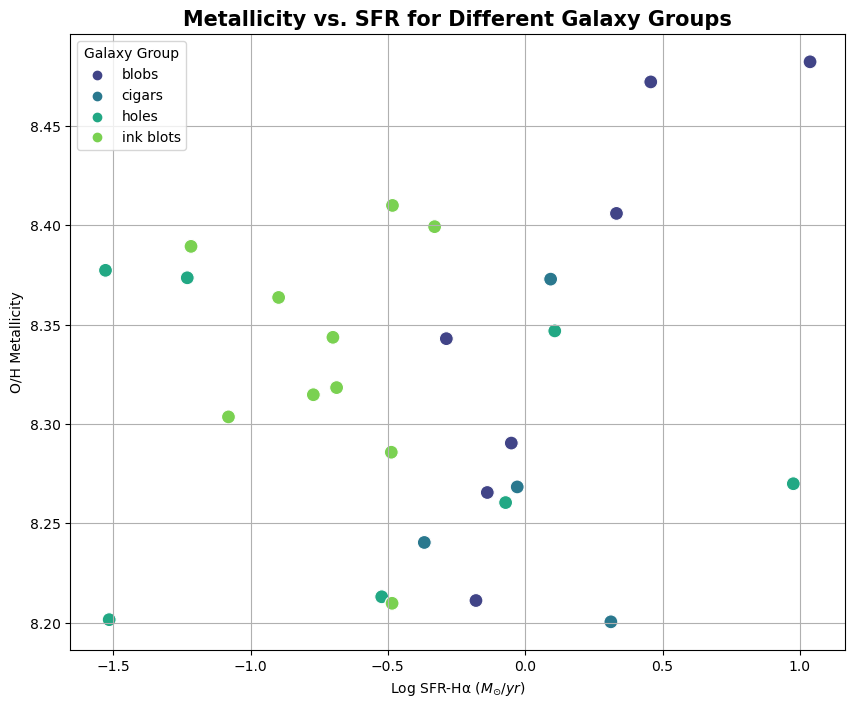

In [146]:
import seaborn as sns
custom_palette = {
    'blobs': 'cyan',     
    'cigars': 'crimson',    
    'holes': 'limegreen',   
    'ink blots': 'darkorange' 
}
#'viridis',
plt.figure(figsize=(10, 8))
sns.scatterplot(data=young_stars_log, x='log_SFR_Ha', y='OH_O3N2_cen', hue='Group', palette='viridis', s=100)
plt.title('Metallicity vs. SFR for Different Galaxy Groups', fontweight = 'bold', fontsize= 15)
plt.xlabel('Log SFR-Hα ($M_{\odot}/yr$)')
plt.ylabel('O/H Metallicity')
plt.legend(title='Galaxy Group')
plt.grid(True)
plt.show()

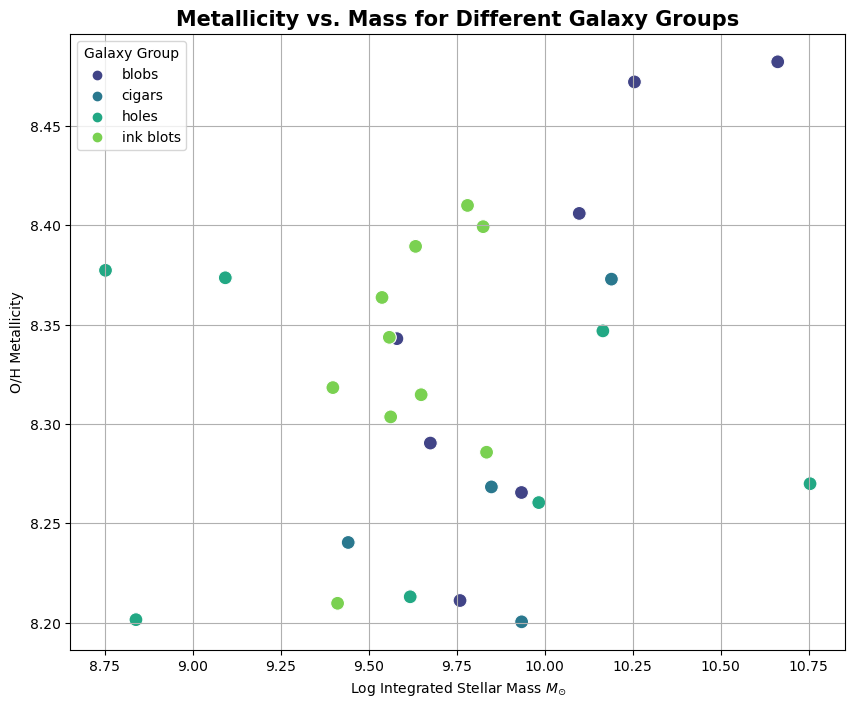

In [147]:
custom_palette = {
    'blobs': 'cyan',      
    'cigars': 'crimson',    
    'holes': 'limegreen',    
    'ink blots': 'darkorange' 
}
plt.figure(figsize=(10, 8))
sns.scatterplot(data=young_stars_log, x='log_Mass', y='OH_O3N2_cen', hue='Group', palette='viridis', s=100)
plt.title('Metallicity vs. Mass for Different Galaxy Groups', fontweight = 'bold', fontsize= 15)
plt.xlabel('Log Integrated Stellar Mass $M_{\odot}$')
plt.ylabel('O/H Metallicity')
plt.legend(title='Galaxy Group')
plt.grid(True)
plt.show()

Here I am looking for any commonalities within my blobs group.

In [198]:
summary_stats = blobs.describe()
print(summary_stats)
modes = blobs.mode().iloc[0]
print("\nMost common values (mode):\n", modes)

              plate       objra     objdec  log_SFR_Ha       FoV    Re_kpc  \
count      7.000000    7.000000   7.000000    7.000000  7.000000  7.000000   
mean    9523.714286  172.030218  29.878524    0.167477  2.898395  4.610649   
std     1627.718415   53.336350  11.399095    0.471694  0.341030  1.958434   
min     7960.000000  119.060993  17.020286   -0.286996  2.223117  2.272466   
25%     8249.500000  124.557012  21.343383   -0.158502  2.820456  2.680015   
50%     9487.000000  167.025036  28.873535   -0.050498  2.963521  5.871816   
75%    10049.500000  205.101808  37.642041    0.394832  3.094962  6.057986   
max    12621.000000  258.807857  45.284997    1.037169  3.271288  6.654260   

       e_log_Mass  e_log_SFR_Ha   log_Mass  log_SFR_ssp  ...    P(Scd)  \
count    7.000000      7.000000   7.000000     7.000000  ...  7.000000   
mean     0.079454      0.078532   9.994507     0.139263  ...  0.166297   
std      0.003454      0.018062   0.377843     0.418365  ...  0.304407   
m

In [217]:
smsd = np.array(blobs['Sigma_Mass_cen'])
10**(smsd.mean())

281.42378887310167

In [260]:
blobs 
# notes: from galaxy zoo for morphologies 
# 102 is uncertain
# 3166 is uncertain
# 3581 is uncertain
# 4673 is uncertain
# 4910 is uncertain
# 9202 is uncertain
# 10000 is uncertain

,name,plate,ifudsgn,plateifu,mangaid,objra,objdec,log_SFR_Ha,FoV,Re_kpc,...,P(Sdm),P(Sm),P(Irr),best_type_n,best_type,nsa_nsaid,Vmax_w,Num_w,QCFLAG,Group
102,manga-10218-12704,10218,12704,10218-12704,1-584678,119.060993,17.020286,-0.286996,3.029757,2.932330,...,0.000034,0.000837,0.843216,10,nan,622212,2.007040e-05,242.25500,0,blobs
3166,manga-12621-6101,12621,6101,12621-6101,1-591967,204.817074,28.873535,0.457260,2.803302,5.997962,...,0.000009,0.000103,0.005427,7,nan,-1000,NaN,NaN,0,blobs
3581,manga-7960-3704,7960,3704,7960-3704,1-177533,258.807857,31.389471,-0.050498,3.271288,2.272466,...,0.000055,0.000634,0.020141,7,nan,187612,1.269950e-05,153.28600,0,blobs
4673,manga-8241-6101,8241,6101,8241-6101,1-461292,127.048526,17.374658,-0.179118,3.160167,2.427700,...,0.000042,0.000487,0.032621,-2,nan,487909,2.011250e-05,242.76300,0,blobs
4910,manga-8258-3704,8258,3704,8258-3704,1-256496,167.025036,43.894611,1.037169,2.963521,5.871816,...,0.000038,0.000166,0.004053,7,nan,271485,1.560000e-07,1.88296,0,blobs
9202,manga-9487-6102,9487,6102,9487-6102,1-45131,122.065499,45.284997,-0.137885,2.223117,6.654260,...,0.000005,0.000189,0.002174,6,nan,48059,4.221100e-06,50.94970,0,blobs
10000,manga-9881-9102,9881,9102,9881-9102,1-458248,205.386543,25.312108,0.332405,2.837610,6.118010,...,0.000039,0.000226,0.891138,10,nan,484542,6.943190e-07,8.38060,0,blobs


In [262]:
holes #from galaxy zoo morphologies
#2407 is uncertain
#4221 is uncertain
#4331 is uncertain
#4932 is uncertain
#5333 is uncertain
#8658 is unclassified
#10063 is uncertain

,name,plate,ifudsgn,plateifu,mangaid,objra,objdec,log_SFR_Ha,FoV,Re_kpc,...,P(Sdm),P(Sm),P(Irr),best_type_n,best_type,nsa_nsaid,Vmax_w,Num_w,QCFLAG,Group
2407,manga-11978-12702,11978,12702,11978-12702,1-294572,249.794250,22.147390,0.107784,2.452821,8.092161,...,0.000019,0.000696,0.233163,7,nan,311636,4.221100e-06,50.94970,0,holes
4221,manga-8131-9101,8131,9101,8131-9101,1-604748,112.573557,39.942075,0.976245,2.831202,7.736350,...,0.000022,0.000300,0.866509,10,nan,646718,1.190060e-06,14.36430,0,holes
4331,manga-8139-3702,8139,3702,8139-3702,1-604791,114.758707,33.916046,-1.230219,1.321403,3.093788,...,0.000009,0.903089,0.000575,9,nan,646782,1.471920e-05,177.66400,0,holes
4932,manga-8259-9101,8259,9101,8259-9101,1-257822,178.343964,44.920520,-0.522268,3.233523,2.727143,...,0.000033,0.000383,0.008390,7,nan,272868,3.002450e-05,362.40300,0,holes
5333,manga-8328-3704,8328,3704,8328-3704,1-286805,211.677261,44.431671,-1.527890,0.964431,3.985173,...,0.000364,0.001588,0.003928,7,nan,303171,1.471920e-05,177.66400,0,holes
8658,manga-9049-6101,9049,6101,9049-6101,1-295506,247.135765,24.721865,-1.514524,2.500742,2.069573,...,0.000240,0.000972,0.008749,7,nan,312621,3.071460e-06,37.07320,0,holes
10063,manga-9885-6101,9885,6101,9885-6101,1-442338,239.419158,22.653394,-0.071244,4.602765,3.217636,...,0.000003,0.000035,0.868473,10,nan,467478,4.011920e-07,4.84248,0,holes


In [264]:
inkblots # from galaxy zoo morphologies
#2 spirals
#2455 is uncertain
#2674 is unclassified
#4061 is unclassified
#4494 is a spiral
#4630 is uncertain
#4680 is unclassified 
#5104 is a spiral
#5511 is uncertain
#5647 is uncertain
#9461 is unclassified
#9480 is a uncertain
#10076 is unclassified

,name,plate,ifudsgn,plateifu,mangaid,objra,objdec,log_SFR_Ha,FoV,Re_kpc,...,P(Sdm),P(Sm),P(Irr),best_type_n,best_type,nsa_nsaid,Vmax_w,Num_w,QCFLAG,Group
2455,manga-11981-12701,11981,12701,11981-12701,1-294261,254.224962,20.357200,-0.897608,2.180290,4.772091,...,0.961481,0.000078,0.001960,8,nan,-1000,NaN,NaN,0,ink blots
2674,manga-12079-12704,12079,12704,12079-12704,1-108741,29.748608,0.908496,-0.483143,3.364393,5.989412,...,0.957358,0.000010,0.000589,8,nan,115069,2.778090e-06,33.532300,0,ink blots
4061,manga-8087-12703,8087,12703,8087-12703,1-119819,358.542292,15.222368,-0.329737,3.926750,5.025229,...,0.966030,0.000149,0.000428,8,nan,126878,3.161990e-06,38.166000,0,ink blots
4494,manga-8150-12702,8150,12702,8150-12702,1-389244,146.991437,32.991546,-0.771206,2.112368,5.449141,...,0.000037,0.000538,0.005112,7,nan,411909,1.269950e-05,153.286000,0,ink blots
4630,manga-8239-12703,8239,12703,8239-12703,1-378400,117.568594,47.889405,-1.080216,2.233439,4.240133,...,0.000032,0.912170,0.003633,9,nan,400325,1.894360e-05,228.653000,0,ink blots
4680,manga-8243-12702,8243,12702,8243-12702,1-46494,130.386989,52.490198,-1.216556,1.465962,6.233158,...,0.000016,0.934968,0.000272,9,nan,49495,1.034800e-05,124.902000,0,ink blots
5104,manga-8314-12703,8314,12703,8314-12703,1-248638,243.212322,40.318839,0.516321,0.436161,64.224777,...,0.724543,0.001051,0.129992,8,nan,263269,4.048690e-08,0.488687,0,ink blots
5511,manga-8341-12703,8341,12703,8341-12703,1-283278,190.581427,47.219988,-0.487447,3.884573,5.142752,...,0.959437,0.000009,0.000260,8,nan,299525,3.161990e-06,38.166000,0,ink blots
5647,manga-8445-12703,8445,12703,8445-12703,1-409272,207.126149,35.272748,-0.686507,2.388198,4.655885,...,0.000013,0.001375,0.019230,7,nan,432856,1.282700e-05,154.825000,0,ink blots
9461,manga-9503-12703,9503,12703,9503-12703,1-556689,120.328458,25.289822,-0.699897,1.936175,4.210237,...,0.000045,0.000976,0.011797,6,nan,589641,2.007040e-05,242.255000,0,ink blots


In [265]:
cigars  # from galaxy zoo morphologies
#2 spirals
#455 is a spiral
#4530 is a spiral
#6004 is uncertain
#6584 is uncertain

,name,plate,ifudsgn,plateifu,mangaid,objra,objdec,log_SFR_Ha,FoV,Re_kpc,...,P(Sdm),P(Sm),P(Irr),best_type_n,best_type,nsa_nsaid,Vmax_w,Num_w,QCFLAG,Group
485,manga-10506-12704,10506,12704,10506-12704,1-232047,139.137845,35.161282,-0.367207,3.822958,2.391625,...,0.000016,0.000664,0.017434,5,nan,245786,1.237230e-04,1493.37000,0,cigars
4530,manga-8153-12704,8153,12704,8153-12704,1-36705,39.536011,-0.642306,0.312080,2.830150,7.221379,...,0.000046,0.000529,0.005624,7,nan,39122,4.221100e-06,50.94970,0,cigars
6004,manga-8483-12701,8483,12701,8483-12701,1-92487,244.188130,48.600320,0.092698,2.828987,8.098573,...,0.000149,0.000409,0.001108,4,nan,97876,1.221580e-07,1.47448,0,cigars
6584,manga-8598-12704,8598,12704,8598-12704,1-632479,230.539936,48.392129,-0.028928,4.692266,4.152618,...,0.000045,0.284658,0.288738,10,nan,684794,1.090140e-06,13.15830,0,cigars


In [9]:
import numpy as np
np.log10(248033424.06410614)

8.394510208683098

Below I was finding the average ages, average stellar mass surface densities (within the central 2 arcseconds), the average look back time at which the galaxy had formed 30% of its mass as well as the corresponding average stellar metallicity, and the stellar velocity at twice the effective radius of each of the subgroups of galaxies.

In [123]:
blobages = np.array(blobs['Age_LW_Re_fit']
10**(blobages.mean())

248033424.06410614

In [124]:
holeages = np.array(holes['Age_LW_Re_fit'])
10**(holeages.mean())

223325439.3074021

In [125]:
inkblotages = np.array(inkblots['Age_LW_Re_fit'])
10**(inkblotages.mean())

211831836.54674754

In [214]:
cigarages = np.array(cigars['Age_LW_Re_fit'])
10**(cigarages.mean())

209268810.57119298

In [ ]:
#Stellar Mass surface density in the central 2arcsec

In [220]:
blobsmsd = np.array(blobs['Sigma_Mass_cen'])
10**(blobsmsd.mean())

281.42378887310167

In [221]:
holesmsd = np.array(holes['Sigma_Mass_cen'])
10**(holesmsd.mean())

113.14307099108723

In [126]:
inksmsd = np.array(inkblots['Sigma_Mass_cen'])
10**(inksmsd.mean())

99.81072011060698

In [223]:
cigsmsd = np.array(cigars['Sigma_Mass_cen'])
10**(cigsmsd.mean())

51.0702640033556

In [225]:
#Look Back time at which the galaxy has formed 30% of its mass

In [227]:
blobt30 = np.array(blobs['T30'])
blobt30.mean()

12.525068711476356

In [228]:
holet30 = np.array(holes['T30'])
holet30.mean()

12.565875882202343

In [232]:
inkt30 = np.array(inkblots['T30'])
inkt30.mean()

11.828295502749187

In [233]:
cigt30 = np.array(cigars['T30'])
cigt30.mean()

12.298017578366599

In [234]:
#Stellar metallicity at T30 time

In [237]:
blobz30 = np.array(blobs['ZH_T30'])
blobz30.mean()

-1.5693943239505213

In [238]:
holet30 = np.array(holes['ZH_T30'])
holet30.mean()

-1.4315091537579527

In [239]:
inkt30 = np.array(inkblots['ZH_T30'])
inkt30.mean()

-1.397169352604423

In [240]:
cigt30 = np.array(cigars['ZH_T30'])
cigt30.mean()

-1.54698124359284

In [241]:
#stellar velocity at 2Re
#Re_kpc	float64	kpc	Effective radius in kpc

In [242]:
blobvel = np.array(blobs['vel_ssp_2'])
blobvel.mean()

36.637275572441936

In [243]:
holevel = np.array(holes['vel_ssp_2'])
holevel.mean()

18.894628949048286

In [127]:
inkvel = np.array(inkblots['vel_ssp_2'])
inkvel.mean()

77.6069370621499

In [245]:
cigvel = np.array(cigars['vel_ssp_2'])
cigvel.mean()

140.30749979580025

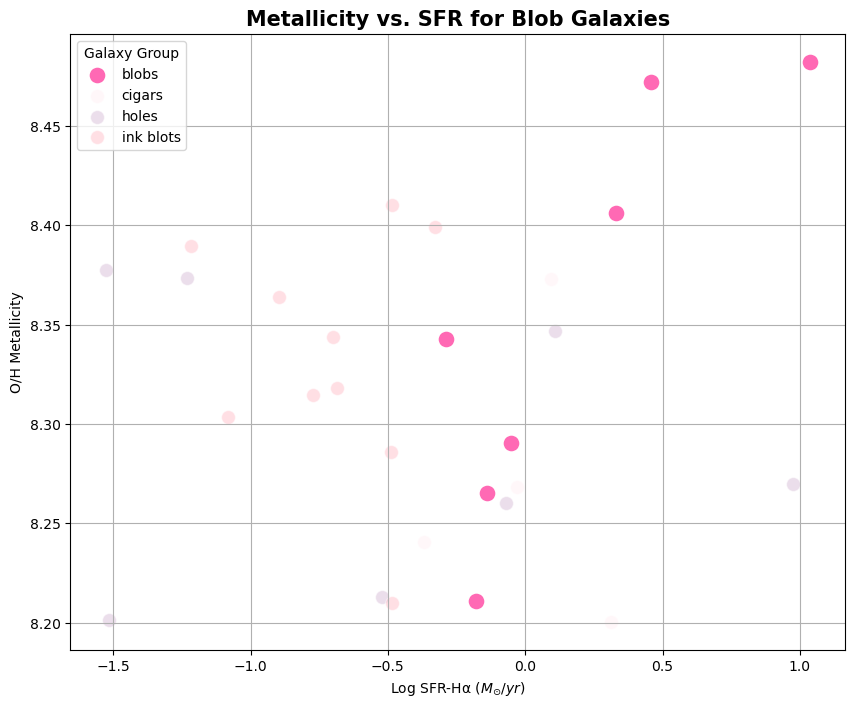

In [140]:
blobpalette = {
    'blobs': 'hotpink',     
    'cigars': 'lavenderblush',   
    'holes': 'thistle',    
    'ink blots': 'pink'
}
group_opacity = {'blobs': 1, 'cigars': 0.5, 'holes': 0.5, 'ink blots': 0.5}
group_sizes = {'blobs': 150, 'cigars': 100, 'holes': 100, 'ink blots': 100}

plt.figure(figsize=(10, 8))
for group, color in blobpalette.items():
    subset = young_stars_log[young_stars_log['Group'] == group]
    sns.scatterplot(data=subset, x='log_SFR_Ha', y='OH_O3N2_cen', color=color,
                    alpha=group_opacity[group], s=group_sizes[group], label=group)
plt.title('Metallicity vs. SFR for Blob Galaxies', fontweight = 'bold', fontsize= 15)
plt.xlabel('Log SFR-Hα ($M_{\odot}/yr$)')
plt.ylabel('O/H Metallicity')
plt.legend(title='Galaxy Group')
plt.grid(True)
plt.show()

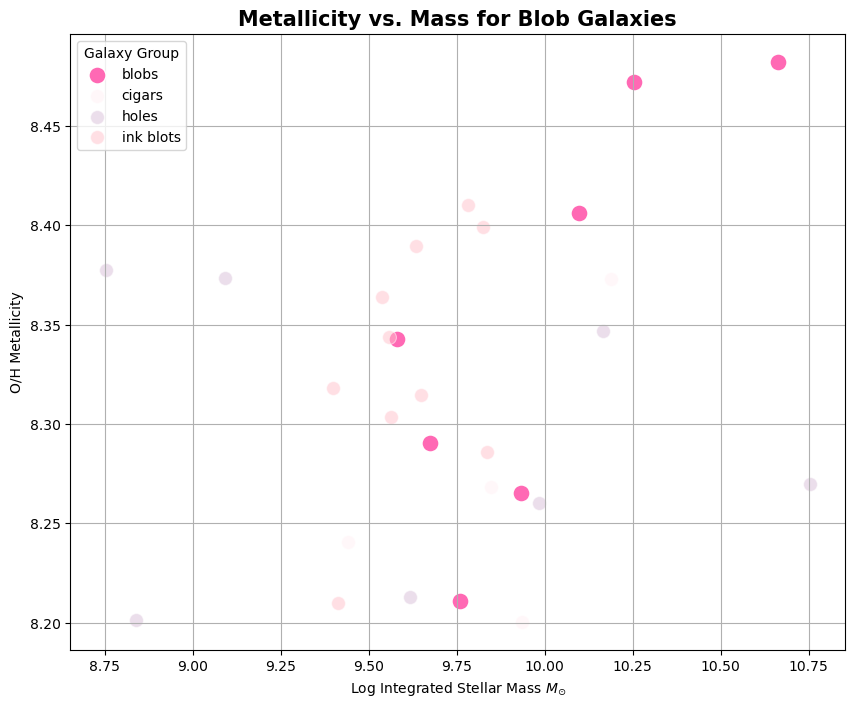

In [116]:
blobpalette = {
    'blobs': 'hotpink',     
    'cigars': 'lavenderblush',    
    'holes': 'thistle',    
    'ink blots': 'pink' 
}
group_opacity = {'blobs': 1, 'cigars': 0.5, 'holes': 0.5, 'ink blots': 0.5}
group_sizes = {'blobs': 150, 'cigars': 100, 'holes': 100, 'ink blots': 100}
plt.figure(figsize=(10, 8))
for group, color in blobpalette.items():
    subset = young_stars_log[young_stars_log['Group'] == group]
    sns.scatterplot(data=subset, x='log_Mass', y='OH_O3N2_cen', color=color,
                    alpha=group_opacity[group], s=group_sizes[group], label=group)
plt.title('Metallicity vs. Mass for Blob Galaxies', fontweight = 'bold', fontsize= 15)
plt.xlabel('Log Integrated Stellar Mass $M_{\odot}$')
plt.ylabel('O/H Metallicity')
plt.legend(title='Galaxy Group')
plt.grid(True)
plt.show()

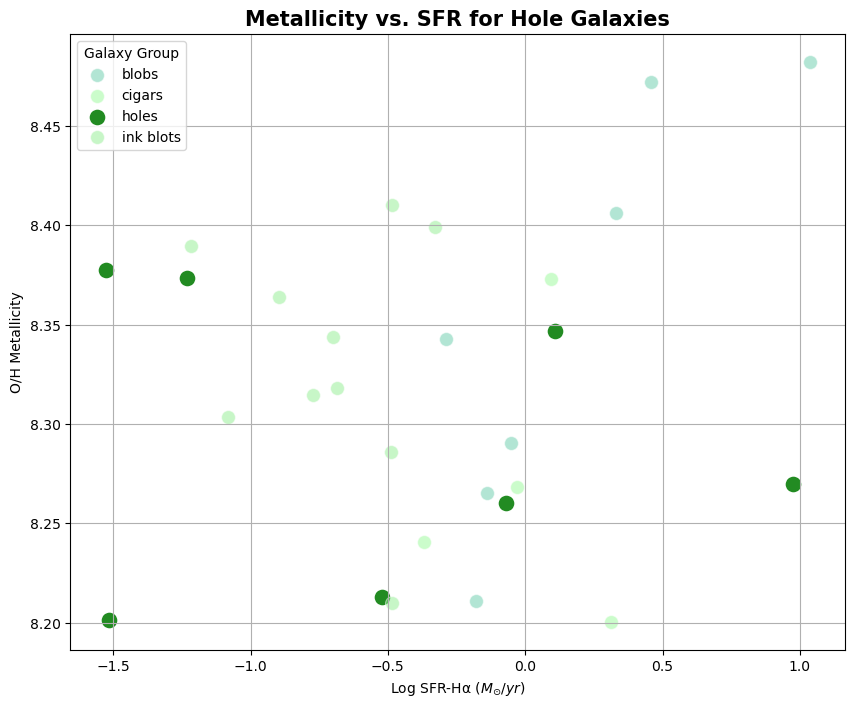

In [141]:
holepalette = {
    'blobs': 'mediumaquamarine',      
    'cigars': 'palegreen',    
    'holes': 'forestgreen',   
    'ink blots': 'lightgreen' 
}
holeopacity = {'blobs': 0.5, 'cigars': 0.5, 'holes': 1, 'ink blots': 0.5}
holesizes = {'blobs': 100, 'cigars': 100, 'holes': 150, 'ink blots': 100}
plt.figure(figsize=(10, 8))
for group, color in holepalette.items():
    subset = young_stars_log[young_stars_log['Group'] == group]
    sns.scatterplot(data=subset, x='log_SFR_Ha', y='OH_O3N2_cen', color=color,
                    alpha=holeopacity[group], s=holesizes[group], label=group)
plt.title('Metallicity vs. SFR for Hole Galaxies', fontweight = 'bold', fontsize= 15)
plt.xlabel('Log SFR-Hα ($M_{\odot}/yr$)')
plt.ylabel('O/H Metallicity')
plt.legend(title='Galaxy Group')
plt.grid(True)
plt.show()

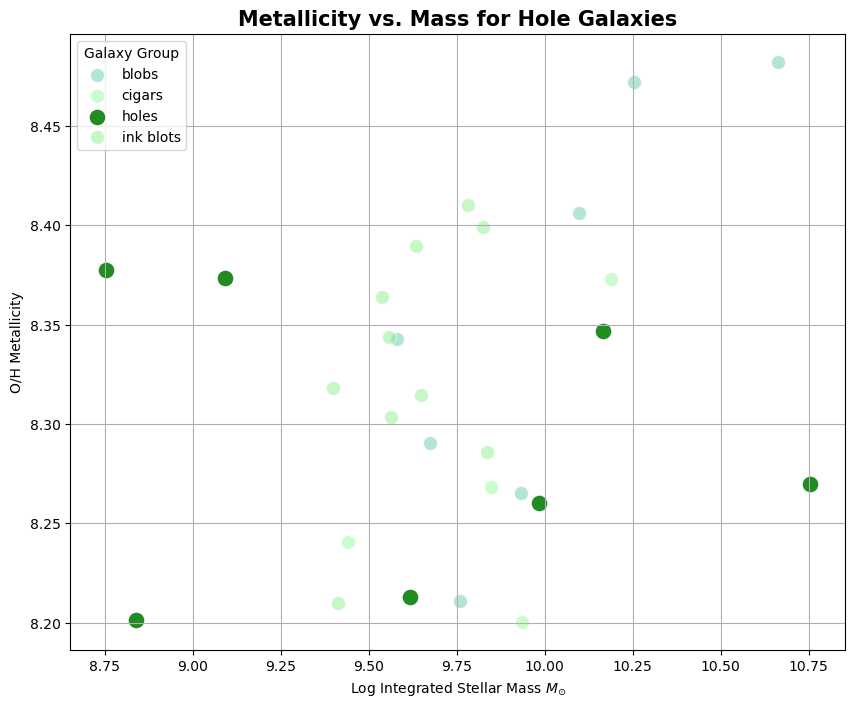

In [118]:
holepalette = {
    'blobs': 'mediumaquamarine',    
    'cigars': 'palegreen',  
    'holes': 'forestgreen',    
    'ink blots': 'lightgreen' 
}
holeopacity = {'blobs': 0.5, 'cigars': 0.5, 'holes': 1, 'ink blots': 0.5}
holesizes = {'blobs': 100, 'cigars': 100, 'holes': 150, 'ink blots': 100}
plt.figure(figsize=(10, 8))
for group, color in holepalette.items():
    subset = young_stars_log[young_stars_log['Group'] == group]
    sns.scatterplot(data=subset, x='log_Mass', y='OH_O3N2_cen', color=color,
                    alpha=holeopacity[group], s=holesizes[group], label=group)
plt.title('Metallicity vs. Mass for Hole Galaxies', fontweight = 'bold', fontsize= 15)
plt.xlabel('Log Integrated Stellar Mass $M_{\odot}$')
plt.ylabel('O/H Metallicity')
plt.legend(title='Galaxy Group')
plt.grid(True)
plt.show()

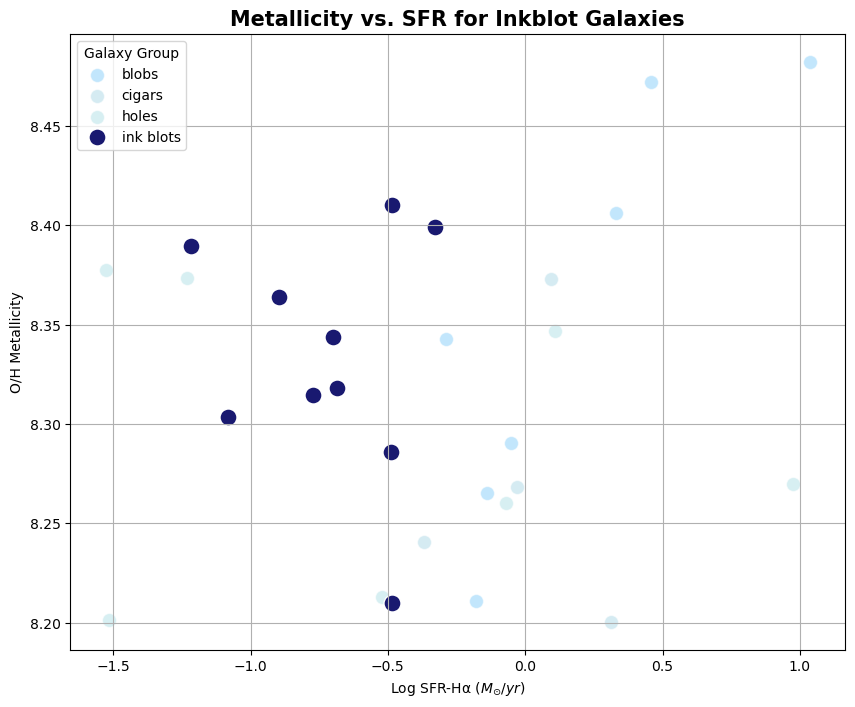

In [142]:
inkpalette = {
    'blobs': 'lightskyblue',      
    'cigars': 'lightblue',    
    'holes': 'powderblue',   
    'ink blots': 'midnightblue' 
}
inkopacity = {'blobs': 0.5, 'cigars': 0.5, 'holes': 0.5, 'ink blots': 1}
inksizes = {'blobs': 100, 'cigars': 100, 'holes': 100, 'ink blots': 150}
plt.figure(figsize=(10, 8))
for group, color in inkpalette.items():
    subset = young_stars_log[young_stars_log['Group'] == group]
    sns.scatterplot(data=subset, x='log_SFR_Ha', y='OH_O3N2_cen', color=color,
                    alpha=inkopacity[group], s=inksizes[group], label=group)
plt.title('Metallicity vs. SFR for Inkblot Galaxies', fontweight = 'bold', fontsize= 15)
plt.xlabel('Log SFR-Hα ($M_{\odot}/yr$)')
plt.ylabel('O/H Metallicity')
plt.legend(title='Galaxy Group')
plt.grid(True)
plt.show()

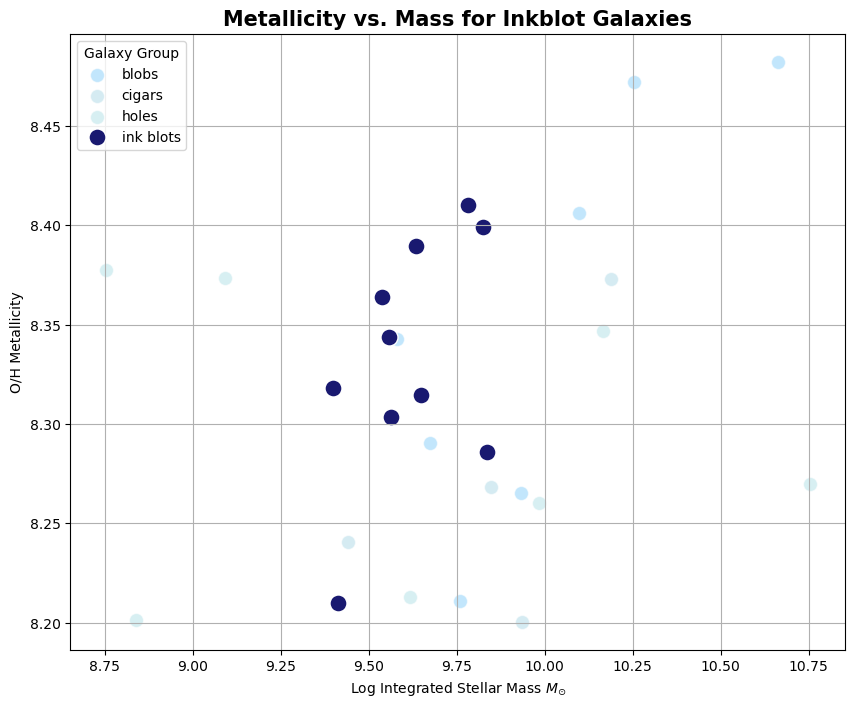

In [120]:
inkpalette = {
    'blobs': 'lightskyblue',     
    'cigars': 'lightblue',    
    'holes': 'powderblue',    
    'ink blots': 'midnightblue'
}
inkopacity = {'blobs': 0.5, 'cigars': 0.5, 'holes': 0.5, 'ink blots': 1}
inksizes = {'blobs': 100, 'cigars': 100, 'holes': 100, 'ink blots': 150}
plt.figure(figsize=(10, 8))
for group, color in inkpalette.items():
    subset = young_stars_log[young_stars_log['Group'] == group]
    sns.scatterplot(data=subset, x='log_Mass', y='OH_O3N2_cen', color=color,
                    alpha=inkopacity[group], s=inksizes[group], label=group)
plt.title('Metallicity vs. Mass for Inkblot Galaxies', fontweight = 'bold', fontsize= 15)
plt.xlabel('Log Integrated Stellar Mass $M_{\odot}$')
plt.ylabel('O/H Metallicity')
plt.legend(title='Galaxy Group')
plt.grid(True)
plt.show()

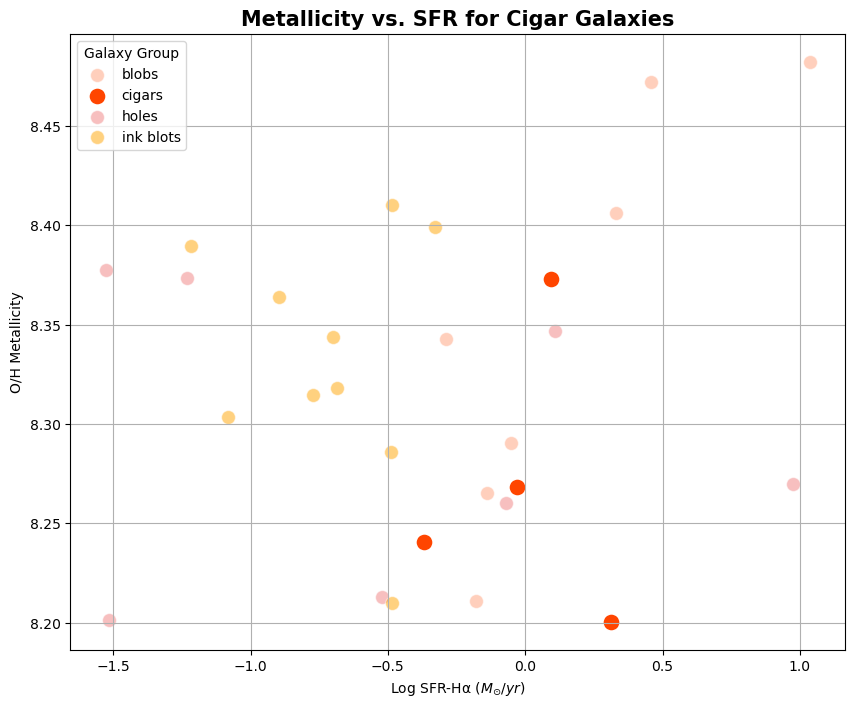

In [143]:
cigpalette = {
    'blobs': 'lightsalmon',      
    'cigars': 'orangered',   
    'holes': 'lightcoral',   
    'ink blots': 'orange' 
}
cigopacity = {'blobs': 0.5, 'cigars': 1, 'holes': 0.5, 'ink blots': 0.5}
cigsizes = {'blobs': 100, 'cigars': 150, 'holes': 100, 'ink blots': 100}
plt.figure(figsize=(10, 8))
for group, color in cigpalette.items():
    subset = young_stars_log[young_stars_log['Group'] == group]
    sns.scatterplot(data=subset, x='log_SFR_Ha', y='OH_O3N2_cen', color=color,
                    alpha=cigopacity[group], s=cigsizes[group], label=group)
plt.title('Metallicity vs. SFR for Cigar Galaxies', fontweight = 'bold', fontsize= 15)
plt.xlabel('Log SFR-Hα ($M_{\odot}/yr$)')
plt.ylabel('O/H Metallicity')
plt.legend(title='Galaxy Group')
plt.grid(True)
plt.show()

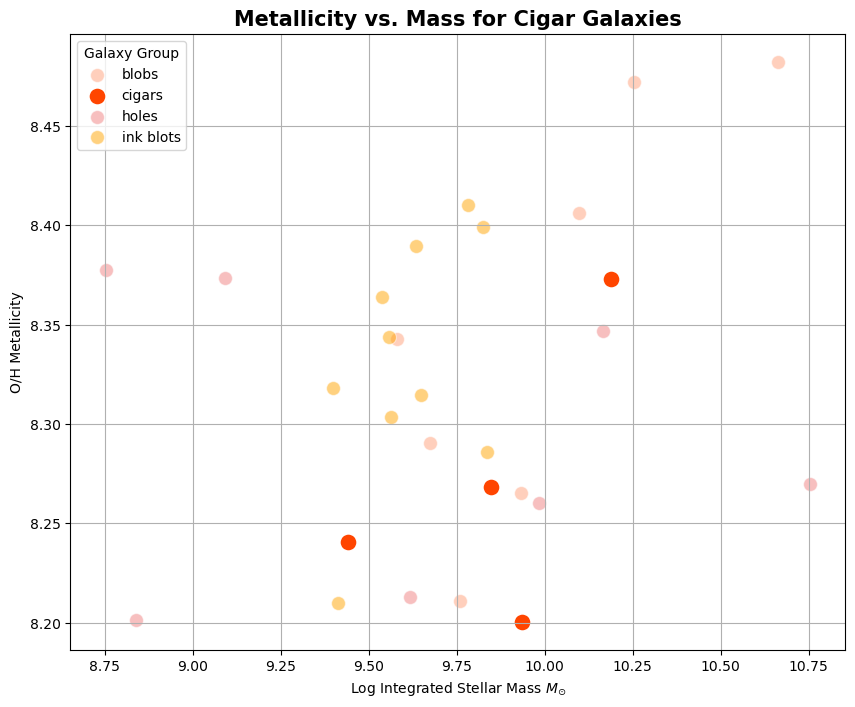

In [122]:
cigpalette = {
    'blobs': 'lightsalmon',      # Example color for blobs
    'cigars': 'orangered',    # Example color for cigars
    'holes': 'lightcoral',    # Example color for holes
    'ink blots': 'orange' # Example color for ink blots
}
cigopacity = {'blobs': 0.5, 'cigars': 1, 'holes': 0.5, 'ink blots': 0.5}
cigsizes = {'blobs': 100, 'cigars': 150, 'holes': 100, 'ink blots': 100}
# Assuming you have already added the 'Group' column to your dataframe
# and 'young_stars_log' is the dataframe we're working with
plt.figure(figsize=(10, 8))
#sns.scatterplot(data=young_stars_log, x='log_SFR_Ha', y='log_NII_Ha_cen', hue='Group', palette=blobpalette, s=100)
for group, color in cigpalette.items():
    # Subset the data by group
    subset = young_stars_log[young_stars_log['Group'] == group]
    # Plot each group with its customizations
    sns.scatterplot(data=subset, x='log_Mass', y='OH_O3N2_cen', color=color,
                    alpha=cigopacity[group], s=cigsizes[group], label=group)
plt.title('Metallicity vs. Mass for Cigar Galaxies', fontweight = 'bold', fontsize= 15)
plt.xlabel('Log Integrated Stellar Mass $M_{\odot}$')
plt.ylabel('O/H Metallicity')
plt.legend(title='Galaxy Group')
plt.grid(True)
plt.show()

[WARNING]:  (SettingWithCopyWarning)


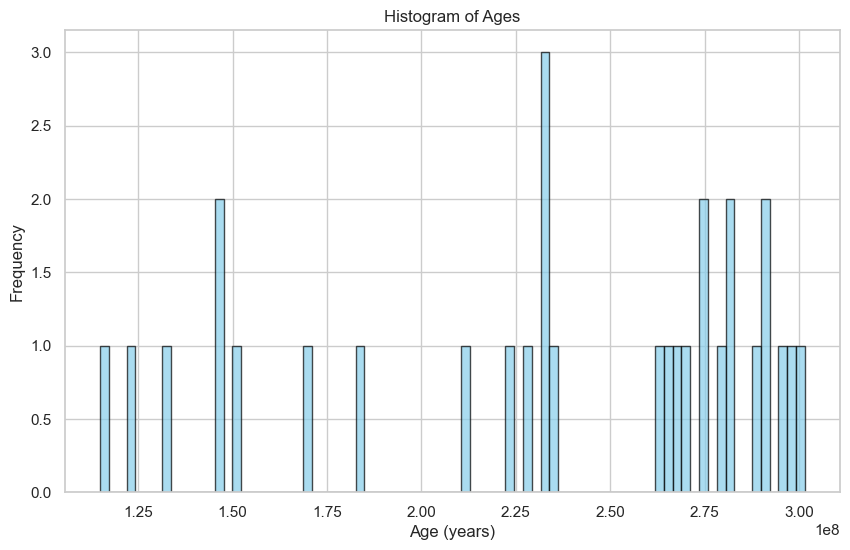

In [296]:


# Assuming 'Age_LW_Re_fit' is in logarithmic years (log(yr))
# Convert log years to linear years
young_stars_log['Age_years'] = np.power(10, young_stars_log['Age_LW_Re_fit'])

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(young_stars_log['Age_years'], bins=80, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Histogram of Ages')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


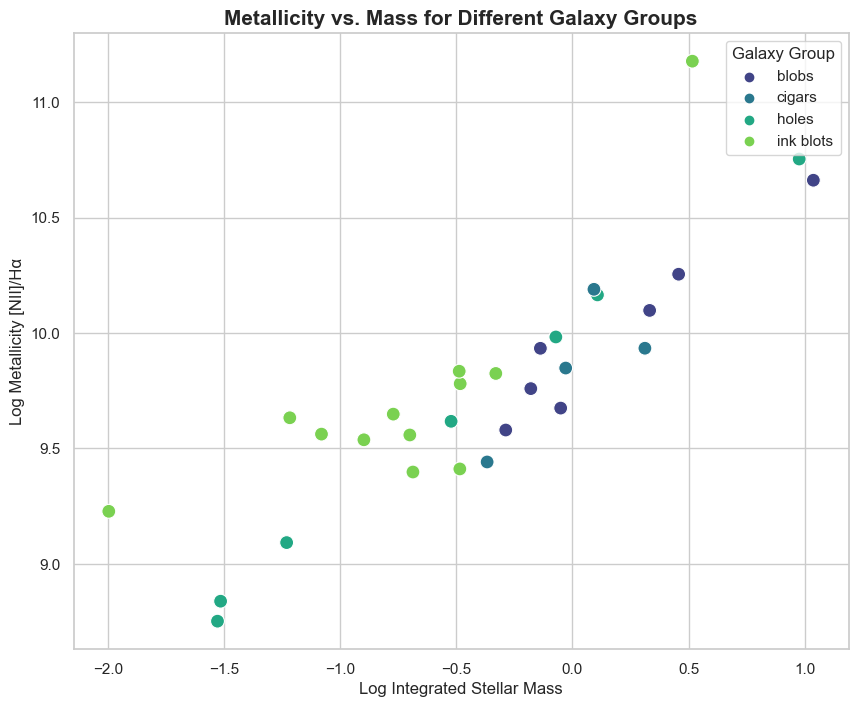

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns


custom_palette = {
    'blobs': 'cyan',      # Example color for blobs
    'cigars': 'crimson',    # Example color for cigars
    'holes': 'limegreen',    # Example color for holes
    'ink blots': 'darkorange' # Example color for ink blots
}
# Assuming you have already added the 'Group' column to your dataframe
# and 'young_stars_log' is the dataframe we're working with
plt.figure(figsize=(10, 8))
sns.scatterplot(data=young_stars_log, x='log_SFR_Ha', y='log_Mass', hue='Group', palette='viridis', s=100)
plt.title('Metallicity vs. Mass for Different Galaxy Groups', fontweight = 'bold', fontsize= 15)
plt.xlabel('Log Integrated Stellar Mass')
plt.ylabel('Log Metallicity [NII]/Hα')
plt.legend(title='Galaxy Group')
plt.grid(True)
plt.show()

In [ ]:
blobpalette = {
    'blobs': 'hotpink',      # Example color for blobs
    'cigars': 'lavenderblush',    # Example color for cigars
    'holes': 'thistle',    # Example color for holes
    'ink blots': 'pink' # Example color for ink blots
}
group_opacity = {'blobs': 1, 'cigars': 0.5, 'holes': 0.5, 'ink blots': 0.5}
group_sizes = {'blobs': 150, 'cigars': 100, 'holes': 100, 'ink blots': 100}
# Assuming you have already added the 'Group' column to your dataframe
# and 'young_stars_log' is the dataframe we're working with
plt.figure(figsize=(10, 8))
#sns.scatterplot(data=young_stars_log, x='log_SFR_Ha', y='log_NII_Ha_cen', hue='Group', palette=blobpalette, s=100)
for group, color in blobpalette.items():
    # Subset the data by group
    subset = young_stars_log[young_stars_log['Group'] == group]
    # Plot each group with its customizations
    sns.scatterplot(data=subset, x='log_SFR_Ha', y='log_NII_Ha_cen', color=color,
                    alpha=group_opacity[group], s=group_sizes[group], label=group)
plt.title('Metallicity vs. Mass for Blob Galaxies', fontweight = 'bold', fontsize= 15)
plt.xlabel('Mass')
plt.ylabel('Log Metallicity [NII]/Hα')
plt.legend(title='Galaxy Group')
plt.grid(True)
plt.show()

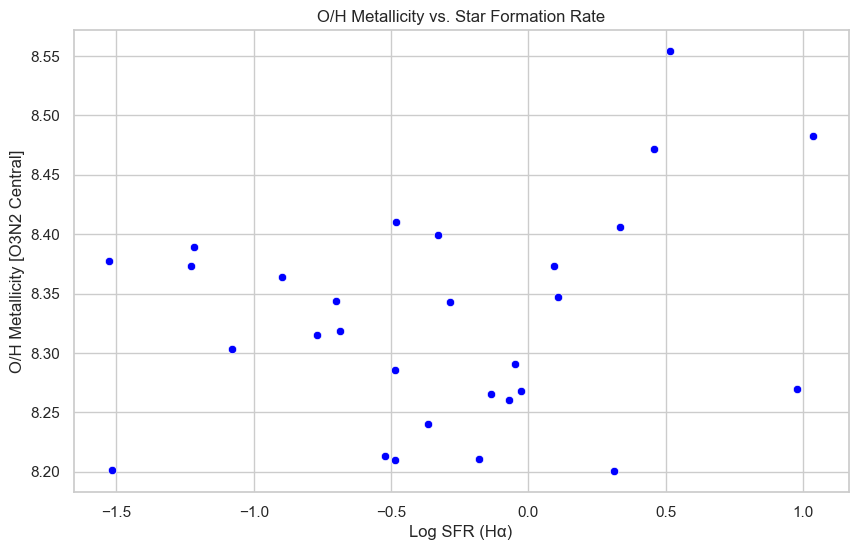

In [299]:
# Ensure your DataFrame is loaded into `young_stars_log`
# Plotting O/H Metallicity vs. SFR
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_SFR_Ha', y='OH_O3N2_cen', data=young_stars_log, color='blue')
plt.title('O/H Metallicity vs. Star Formation Rate')
plt.xlabel('Log SFR (Hα)')
plt.ylabel('O/H Metallicity [O3N2 Central]')
plt.grid(True)
plt.show()

[WARNING]: Glyph 9737 (\N{SUN}) missing from current font. (UserWarning)


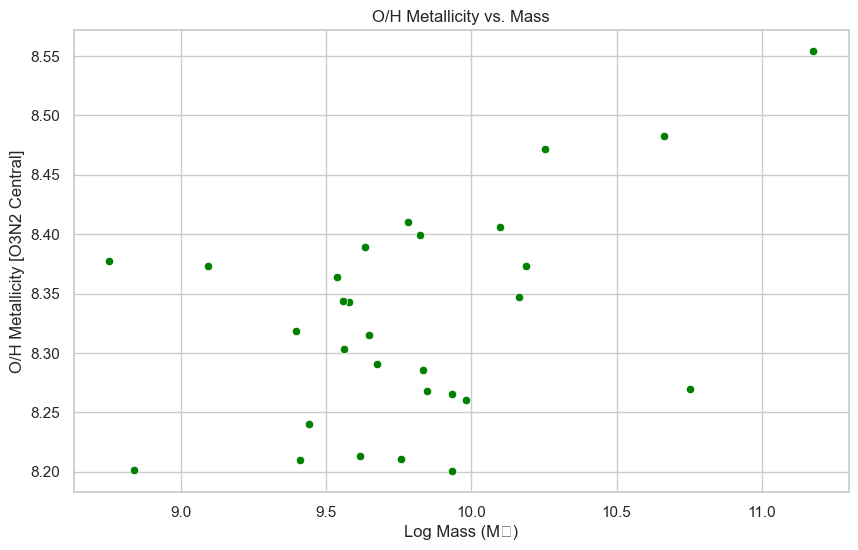

In [300]:
# Plotting O/H Metallicity vs. Mass
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_Mass', y='OH_O3N2_cen', data=young_stars_log, color='green')
plt.title('O/H Metallicity vs. Mass')
plt.xlabel('Log Mass (M☉)')
plt.ylabel('O/H Metallicity [O3N2 Central]')
plt.grid(True)
plt.show()

In [99]:
young_stars_log['QCFLAG']

102      0
485      0
2407     0
2455     0
2674     0
3166     0
3581     0
4061     0
4221     0
4331     0
4494     0
4530     0
4630     0
4673     0
4680     0
4910     0
4932     0
5104     0
5333     0
5511     0
5647     0
6004     0
6584     0
8658     0
9202     0
9461     0
9480     0
10000    0
10063    0
10076    0
Name: QCFLAG, dtype: int64

In [103]:
inkblots['log_Mass']

2455      9.537517
2674      9.780383
4061      9.824794
4494      9.648673
4630      9.562121
4680      9.632873
5104     11.177183
5511      9.834521
5647      9.397956
9461      9.558350
9480      9.411281
10076     9.227782
Name: log_Mass, dtype: float64

In [104]:
inkblots

,name,plate,ifudsgn,plateifu,mangaid,objra,objdec,log_SFR_Ha,FoV,Re_kpc,...,P(Sdm),P(Sm),P(Irr),best_type_n,best_type,nsa_nsaid,Vmax_w,Num_w,QCFLAG,Group
2455,manga-11981-12701,11981,12701,11981-12701,1-294261,254.224962,20.357200,-0.897608,2.180290,4.772091,...,0.961481,0.000078,0.001960,8,nan,-1000,NaN,NaN,0,ink blots
2674,manga-12079-12704,12079,12704,12079-12704,1-108741,29.748608,0.908496,-0.483143,3.364393,5.989412,...,0.957358,0.000010,0.000589,8,nan,115069,2.778090e-06,33.532300,0,ink blots
4061,manga-8087-12703,8087,12703,8087-12703,1-119819,358.542292,15.222368,-0.329737,3.926750,5.025229,...,0.966030,0.000149,0.000428,8,nan,126878,3.161990e-06,38.166000,0,ink blots
4494,manga-8150-12702,8150,12702,8150-12702,1-389244,146.991437,32.991546,-0.771206,2.112368,5.449141,...,0.000037,0.000538,0.005112,7,nan,411909,1.269950e-05,153.286000,0,ink blots
4630,manga-8239-12703,8239,12703,8239-12703,1-378400,117.568594,47.889405,-1.080216,2.233439,4.240133,...,0.000032,0.912170,0.003633,9,nan,400325,1.894360e-05,228.653000,0,ink blots
4680,manga-8243-12702,8243,12702,8243-12702,1-46494,130.386989,52.490198,-1.216556,1.465962,6.233158,...,0.000016,0.934968,0.000272,9,nan,49495,1.034800e-05,124.902000,0,ink blots
5104,manga-8314-12703,8314,12703,8314-12703,1-248638,243.212322,40.318839,0.516321,0.436161,64.224777,...,0.724543,0.001051,0.129992,8,nan,263269,4.048690e-08,0.488687,0,ink blots
5511,manga-8341-12703,8341,12703,8341-12703,1-283278,190.581427,47.219988,-0.487447,3.884573,5.142752,...,0.959437,0.000009,0.000260,8,nan,299525,3.161990e-06,38.166000,0,ink blots
5647,manga-8445-12703,8445,12703,8445-12703,1-409272,207.126149,35.272748,-0.686507,2.388198,4.655885,...,0.000013,0.001375,0.019230,7,nan,432856,1.282700e-05,154.825000,0,ink blots
9461,manga-9503-12703,9503,12703,9503-12703,1-556689,120.328458,25.289822,-0.699897,1.936175,4.210237,...,0.000045,0.000976,0.011797,6,nan,589641,2.007040e-05,242.255000,0,ink blots


In [113]:
young_stars_log['log_SFR_Ha']

102     -0.286996
485     -0.367207
2407     0.107784
2455    -0.897608
2674    -0.483143
3166     0.457260
3581    -0.050498
4061    -0.329737
4221     0.976245
4331    -1.230219
4494    -0.771206
4530     0.312080
4630    -1.080216
4673    -0.179118
4680    -1.216556
4910     1.037169
4932    -0.522268
5104     0.516321
5333    -1.527890
5511    -0.487447
5647    -0.686507
6004     0.092698
6584    -0.028928
8658    -1.514524
9202    -0.137885
9461    -0.699897
9480    -0.484586
10000    0.332405
10063   -0.071244
10076   -1.995763
Name: log_SFR_Ha, dtype: float64

In [114]:
young_stars_log

,name,plate,ifudsgn,plateifu,mangaid,objra,objdec,log_SFR_Ha,FoV,Re_kpc,...,P(Sdm),P(Sm),P(Irr),best_type_n,best_type,nsa_nsaid,Vmax_w,Num_w,QCFLAG,Group
102,manga-10218-12704,10218,12704,10218-12704,1-584678,119.060993,17.020286,-0.286996,3.029757,2.932330,...,0.000034,0.000837,0.843216,10,nan,622212,2.007040e-05,242.255000,0,blobs
485,manga-10506-12704,10506,12704,10506-12704,1-232047,139.137845,35.161282,-0.367207,3.822958,2.391625,...,0.000016,0.000664,0.017434,5,nan,245786,1.237230e-04,1493.370000,0,cigars
2407,manga-11978-12702,11978,12702,11978-12702,1-294572,249.794250,22.147390,0.107784,2.452821,8.092161,...,0.000019,0.000696,0.233163,7,nan,311636,4.221100e-06,50.949700,0,holes
2455,manga-11981-12701,11981,12701,11981-12701,1-294261,254.224962,20.357200,-0.897608,2.180290,4.772091,...,0.961481,0.000078,0.001960,8,nan,-1000,NaN,NaN,0,ink blots
2674,manga-12079-12704,12079,12704,12079-12704,1-108741,29.748608,0.908496,-0.483143,3.364393,5.989412,...,0.957358,0.000010,0.000589,8,nan,115069,2.778090e-06,33.532300,0,ink blots
3166,manga-12621-6101,12621,6101,12621-6101,1-591967,204.817074,28.873535,0.457260,2.803302,5.997962,...,0.000009,0.000103,0.005427,7,nan,-1000,NaN,NaN,0,blobs
3581,manga-7960-3704,7960,3704,7960-3704,1-177533,258.807857,31.389471,-0.050498,3.271288,2.272466,...,0.000055,0.000634,0.020141,7,nan,187612,1.269950e-05,153.286000,0,blobs
4061,manga-8087-12703,8087,12703,8087-12703,1-119819,358.542292,15.222368,-0.329737,3.926750,5.025229,...,0.966030,0.000149,0.000428,8,nan,126878,3.161990e-06,38.166000,0,ink blots
4221,manga-8131-9101,8131,9101,8131-9101,1-604748,112.573557,39.942075,0.976245,2.831202,7.736350,...,0.000022,0.000300,0.866509,10,nan,646718,1.190060e-06,14.364300,0,holes
4331,manga-8139-3702,8139,3702,8139-3702,1-604791,114.758707,33.916046,-1.230219,1.321403,3.093788,...,0.000009,0.903089,0.000575,9,nan,646782,1.471920e-05,177.664000,0,holes


In [128]:
mm = np.array(young_stars_log['log_Mass'])
mm.mean()

9.772321830192322

In [129]:
mm.min()

8.75203106926837

In [130]:
mm.max()

11.1771831996163

In [136]:
mm[mm > 10]

array([10.16495641, 10.25459131, 10.75344221, 10.66162173, 11.1771832 ,
       10.18923209, 10.09780486])

In [139]:
young_stars_log['nsa_redshift']

102      0.016864
485      0.017284
2407     0.038802
2455     0.020216
2674     0.039471
3166     0.045712
3581     0.023957
4061     0.038482
4221     0.050025
4331     0.013052
4494     0.022055
4530     0.039931
4630     0.018026
4673     0.020873
4680     0.017871
4910     0.058472
4932     0.019439
5104     0.055902
5333     0.012853
5511     0.038796
5647     0.021255
6004     0.046301
6584     0.038084
8658     0.013917
9202     0.039790
9461     0.015509
9480     0.020006
10000    0.039184
10063    0.041380
10076    0.021582
Name: nsa_redshift, dtype: float64